# Divisional Demographic Analysis



The goal of this notebook is to output analyses of demographics by division and demographics. The top level folder has three subdirectories: `input`, `output` and `procedure`. `input` holds raw data, `output` holds the results of running analyses, and all analysis scripts are in `procedure`. 

This script assumes that you are running with `procedure` as your current working directory (i.e. from the `procedure` folder), such that input files will have paths like `../input/some_file.txt`. 

## Check available data files

In [1]:
import pandas as pd
from os import listdir
from os.path import join,splitext

#set the input directory path to ../input
#in a system independent fashion
data_dir = join("..","input")
output_dir = join("..","output")

#collect the names of all files in the data directory
input_filepaths = listdir(data_dir)

print(f"Available data files: {input_filepaths}")

Available data files: ['.DS_Store', 'student_data_spring_2023.csv', 'Major_Codes_autumn_2023.csv', 'student_data_winter_2023.csv']


You should see 'student_data_spring_2023.csv` in the list of input files.

## Remove identifying data columns - only needs to be run once

Some data columns contain identifying data. We only want to work with de-identified data, so we will remove these, then save 'clean' tables for analysis 

In [2]:
identifying_columns = ["Student_Number","Local_Phone","perm_line_1","Student_Name",\
                       "Last_Name","First_Name","Middle_Name","Suffix","Preferred_Last",
                       "Local_Zip","Birthdate","Preferred_First","Preferred_Middle","Email","ExtEmail", 'Local_Address_1',\
                       'Local_Address_2', 'Local_City', 'Local_State', 'perm_line_2', 'perm_city', 'perm_state', 'perm_zip_5', 'perm_country', 'perm_postal_cd', 'LastSchoolName',]

for input_file_name in input_filepaths:
    print(f"Analyzing {input_file_name}...")
    if not input_file_name.startswith("student_data"):
        print(f"{input_file_name} is not a student data file ... skipping")
        continue
    student_data_path = join(data_dir,input_file_name)
    
    #Get the file extension (e.g. .txt, .csv, etc)
    root_file_name,file_extension = splitext(input_file_name)
    
    #Skip files that aren't csvs (note: you can export to csv from Excel)
    if file_extension != ".csv":
        print(f"Input file {input_filepath} is not a .csv file ...skipping")
    
    student_data = pd.read_csv(student_data_path)

    
    for col in identifying_columns:
        if col in student_data.columns:
            student_data = student_data.drop([col],axis=1)
    
    #overwrite unclean data
    clean_student_data_path = join(root_file_name + ".csv")
    
    majors = student_data['Major1'].unique()
    
    #Codes translated from course catalog at https://www.uwb.edu/registrar/autumn-2023
    
    simplified_names = {"BEARTH":"Earth Systems Science","BIMD":"Interactive Media and Design",\
                        "B CORE":"University Studies and Programs - Discovey Core",\
                        "B CUSP": "University Studies and Programs - General Education Requirements",\
                        "B DATA": "Data Studies",\
                        "BJAPAN": "Japanese",\
                        "B LEAD": "Leadership",\
                        "B SPAIN": "Spanish",\
                        "B WRIT": "Writing",\
                        "B BUS": "Business",\
                        "B MBA": "Business (MBA)",\
                        "B BECN": "Business Economics",\
                        "ELCBUS": "Business in Bellevue",\
                        "B ACCT": "Accounting",\
                        "BEDUC" : "Education",\
                        "B ED"  : "Education",\
                        "LEDE"  : "Leadership Development for Educators",\
                        "BIS"   : "Interdisciplinary Studies",\
                        "BISSKL": "Interdisciplinary Study Skills",\
                        "BISAES": "American & Ethnic Studies",\
                        "BISCLA": "Culture, Literature, and the Arts",\
                        "BES"   : "Environmental Studies",\
                        "BISGWS": "Gender, Women and Sexuality Studies",\
                        "BISGST": "Global Studies",\
                        "BISIA" :"Interdisciplinary Arts",\
                        "BISLEP":"Law, Economics, and Public Policy",\
                        "BISMCS": "Media and Communication Studies",\
                        "BISPSY": "Psychology",\
                        "B PSY" : "Psychology",\
                        "BISSTS": "Science, Technology, and Society",\
                        "BISSTA": "Social Thought and Action",\
                        "BPOLST": "Master of Policy Studies",\
                        "BCULST": "Master of Cultural Studies",\
                        "BCWRIT": "Master of Fine Arts in Creative Writing and Poetics",\
                        "BHLTH" : "Health Electives",\
                        "BHS"   : "Health Studies",\
                        "B NURS" : "Nursing",\
                        "BST"   : "Science and Technology",\
                        "B BIO" : "Biology",\
                        "CSS"   : "Computing and Software Systems",\
                        "CSSSKL": "Computing and Software Systems Skills",\
                        "MCSS"  : "Computing and Software Systems (Masters)",\
                        "B CE"  : "Computer Engineering",\
                        "B ENGR": "Engineering",\
                        "B EE"  : "Electrical Engineering",\
                        "BEE"   : "Electrical Engineering",\
                        "B MATH": "Mathematics",\
                        "STMATH": "Mathematics",\
                        "B ME"  : "Mechanical Engineering",\
                        "B CHEM": "Chemistry",\
                        "B PHYS": "Physics",\
                        "MTV":"Mathematical Thinking and Visualization"}
    
    major_mapping = {"All Majors":"All Majors"}
    for m in majors:       
        for s in simplified_names.keys():           
            if s in m:
                #print(f"Shortening {m} to {simplified_names[s]}")
                major_mapping[m] = simplified_names[s]

    student_data = student_data.replace({"Major1":major_mapping,"Gender":{" ": "All Others"}})
    print(f"Outputting student data to {clean_student_data_path}")
    student_data.to_csv(clean_student_data_path)

Analyzing .DS_Store...
.DS_Store is not a student data file ... skipping
Analyzing student_data_spring_2023.csv...
Outputting student data to student_data_spring_2023.csv
Analyzing Major_Codes_autumn_2023.csv...
Major_Codes_autumn_2023.csv is not a student data file ... skipping
Analyzing student_data_winter_2023.csv...
Outputting student data to student_data_winter_2023.csv


## Show the format of Student Data

In [3]:
student_data

Count        Campus FERPA_Block Gender     Class   Residency  \
0         1  Bothell                N      F    Junior    RESIDENT   
1         2  Bothell                N      F  Freshman    RESIDENT   
2         3  Bothell                N      F  Graduate    RESIDENT   
3         4  Bothell                N      F    Senior    RESIDENT   
4         5  Bothell                N      F  Freshman    RESIDENT   
...     ...           ...         ...    ...       ...         ...   
5639   5640  Bothell                N      M    Junior    RESIDENT   
5640   5641  Bothell                N      M    Senior    RESIDENT   
5641   5642  Bothell                N      F    Senior    RESIDENT   
5642   5643  Bothell                Y      F    Junior  NONRES-CIT   
5643   5644  Bothell                N      F  Freshman  NONRES-CIT   

     Ethnicity_Race                      Ethnic_Long_Desc  \
0             WHITE                                 WHITE   
1             WHITE                                 WHITE   
2           AFRO-AM            BLACK/AFRICAN AMER, SOMALI   
3           AFRO-AM   AFRICAN, BLACK/AFRICAN AMER, SOMALI   
4          HISPANIC                         NOT INDICATED   
...             ...                                   ...   
5639    TWO OR MORE                     SRI LANKAN, WHITE   
5640          WHITE                                 WHITE   
5641    TWO OR MORE                       FILIPINO, WHITE   
5642       HISPANIC                                 WHITE   
5643          WHITE                                 WHITE   

                                               Hispanic  \
0      NOT HISPANIC                                 ...   
1      NOT HISPANIC                                 ...   
2      NOT HISPANIC                                 ...   
3      NOT HISPANIC                                 ...   
4      HISPANIC                                     ...   
...                                                 ...   
5639   NOT HISPANIC                                 ...   
5640   NOT HISPANIC                                 ...   
5641   NOT HISPANIC                                 ...   
5642   CHILEAN                                      ...   
5643   NOT HISPANIC                                 ...   

                                       Underrepresented  ... RequestedMajor2  \
0     Not URM                                       ...  ...             NaN   
1     Not URM                                       ...  ...             NaN   
2     URM                                           ...  ...             NaN   
3     URM                                           ...  ...             NaN   
4     URM                                           ...  ...             NaN   
...                                                 ...  ...             ...   
5639  Not URM                                       ...  ...             NaN   
5640  Not URM                                       ...  ...             NaN   
5641  Not URM                                       ...  ...             NaN   
5642  URM                                           ...  ...             NaN   
5643  Not URM                                       ...  ...             NaN   

     RequestedMajor3 IntendedMajor1 IntendedMajor2  IntendedMajor3  \
0                NaN            NaN            NaN             NaN   
1                NaN            NaN            NaN             NaN   
2                NaN            NaN            NaN             NaN   
3                NaN            NaN            NaN             NaN   
4                NaN            NaN            NaN             NaN   
...              ...            ...            ...             ...   
5639             NaN            NaN            NaN             NaN   
5640             NaN            NaN            NaN             NaN   
5641             NaN            NaN            NaN             NaN   
5642             NaN            NaN            NaN            

## Show available data columns

In [4]:
data_columns = list(student_data.columns)
print("Student data columns:", data_columns)

Student data columns: ['Count', 'Campus', 'FERPA_Block', 'Gender', 'Class', 'Residency', 'Ethnicity_Race', 'Ethnic_Long_Desc', 'Hispanic', 'Underrepresented', 'First_Generation', 'First_Generation_4_Yr', 'Veteran', 'Veteran_Benefits', 'Disability', 'asuw', 'reg_hold', 'hold_office', 'hold_reason', 'ncr', 'admitted', 'appl_stat_descrip', 'appl_type_descrip', 'RegisFirstYrQtr', 'LastEnrolled', 'EnrollStatus', 'EnrollStatusDesc', 'Registered_in_Current_Qtr', 'Registered_Credits', 'Total_Credits', 'tot_extension', 'transfer_credits', 'uw_credits_earned', 'tot_grade_points', 'tot_graded_attmp', 'GPA', 'jr_col_gpa', 'sr_col_gpa', 'high_sch_gpa', 'Exemption_Status', 'Major1', 'DeptGPA1', 'Major2', 'DeptGPA2', 'Major3', 'DeptGPA3', 'Minor1', 'Minor1_Date', 'Minor2', 'Minor2_Date', 'Minor3', 'Minor3_Date', 'PendingMajor1', 'PendingMajor1_YrQtr', 'PendingMajor2', 'PendingMajor2_YrQtr', 'PendingMajor3', 'PendingMajor3_YrQtr', 'RequestedMajor1', 'RequestedMajor2', 'RequestedMajor3', 'IntendedMajor

## Define helper functions for summarizing and graphing data

In [12]:
import seaborn as sns
from IPython.display import display,HTML
import matplotlib.pyplot as plt
import statsmodels.stats.proportion as smprop


def summarize_demographics_by_division(student_data, demographic_col='Gender'):
    """Create a dataframe of demographics by division 
    
    student_data -- pandas dataframe of student data
    demographic col -- name of the column we want to compare (e.g. 'Gender', 'Underrepresented')
    
    """
    #Filter to just our columns of interest
    major_data = student_data.loc[:,['Major1',demographic_col]]

    #Count how often each value occurs in this reduced table
    by_major_counts = major_data.value_counts()

    #Weird reset index step -- this converts our grouped series back into a 
    #regular 'ol DataFrame 
    by_major_counts = by_major_counts.reset_index()

    #Rename columns so they are more readable
    by_major_counts.columns = ['Major1',demographic_col,'Count']
    by_major_counts
    by_major_counts = by_major_counts.sort_values(['Major1',demographic_col])

    #Now repeat to get the campus gender counts
    campus_data = student_data.loc[:,[demographic_col]]
    #Count how often each value occurs in this reduced table
    campus_counts = campus_data.value_counts()
    campus_counts = campus_counts.reset_index()
    campus_counts.columns = [demographic_col,'Count']
    campus_counts['Major1'] = 'All Majors'
    campus_counts = campus_counts.sort_values(['Major1',demographic_col])

    major_df = pd.concat([by_major_counts,campus_counts])
    majors = major_df['Major1'].unique()


    major_df[f"Count_by_Major_and_{demographic_col}"] = major_df.groupby(["Major1",demographic_col])["Count"].transform('sum')
    major_df["Count_by_Major"] = major_df.groupby(["Major1"])["Count"].transform('sum')
    major_df[f"{demographic_col}_Frequency_within_Major"] =\
    major_df[f"Count_by_Major_and_{demographic_col}"]/major_df["Count_by_Major"]
    major_df = major_df.drop("Count",axis=1)
    major_df = major_df.drop_duplicates()
    return major_df

def get_campus_fraction(df,demographic_col,focal_category,all_majors_category='All Majors',verbose=False):
    result =  get_major_fraction(df,demographic_col,focal_category,major=all_majors_category,verbose=verbose)
    return result

def get_major_fraction(df,demographic_col,focal_category,major,verbose=False):
    category_count = df[(df[demographic_col] == focal_category) & (df['Major1'] == major)][f'Count_by_Major_and_{demographic_col}'].sum()
    non_category_count = df[(df[demographic_col] != focal_category) & (df['Major1'] == major)][f'Count_by_Major_and_{demographic_col}'].sum()
    total = category_count + non_category_count
    category_fraction =\
    category_count / total
    rounded_percentage = round(category_fraction*100,1) 
    if verbose:
        print(f" {category_count} ({rounded_percentage} %) of {total} students in {major}, are listed as {demographic_col} = {focal_category}" )
    return category_count,non_category_count,category_fraction

def get_major_ratio(df,demographic_col,focal_category,major='Biology',all_majors_category='All Majors',verbose=False):
    _,_,category_fraction= get_major_fraction(df,demographic_col,focal_category,major=major,verbose=verbose)  
    _,_,campus_category_fraction = get_campus_fraction(df,demographic_col,focal_category,verbose=verbose)
    return category_fraction/campus_category_fraction

def plot_demographic_frequencies(major_df,demographic_col,output_dir="../output"):
    """Save to output"""
    
    for major in list(set(major_mapping.values())):
        print(f"Plotting major: {major}")
        major_rows = major_df['Major1'] == major 
        campus_rows = major_df['Major1'] == 'All Majors'

        rows_to_keep = major_rows | campus_rows # logical element-wise OR
        curr_data = major_df[rows_to_keep]

        unique_demographic_values = sorted(list(curr_data[demographic_col].unique()))

        
        hue_order = sorted(list(curr_data[demographic_col].unique()))
            
        palette = sns.color_palette("husl", len(unique_demographic_values))
        sns.barplot(x='Major1', y=f'{demographic_col}_Frequency_within_Major', hue=demographic_col,hue_order=hue_order,\
              data=curr_data,edgecolor="black",palette=palette)

        graph_output_file = join(output_dir,f"{major}_{demographic_col}_frequency.png")
        plt.legend(bbox_to_anchor=(1.1,1.0))
        plt.savefig(graph_output_file,bbox_inches="tight",facecolor="white")
        plt.show()
        plt.clf()
    
        
def summarize_counts_by_category(df,demographic_col):
    """Summarize counts within a focal demographic category on campus vs. within majors
    df -- a pandas DataFrame 
    demographic_col -- the demographic column to add counts for
    """
    data = []

    for focal_category in sorted(list(df[demographic_col].unique())):

        #Calculate demographics across all majors
        campus_category_count,campus_non_category_count,campus_category_fraction = get_campus_fraction(df,demographic_col,focal_category)


        df[f'Campus_{demographic_col}_count'] = campus_category_count
        df[f'Campus_non-{demographic_col}_count'] = campus_non_category_count
        df[f'Campus_{demographic_col}_fraction'] = campus_category_fraction

        for major in list(set(major_mapping.values())):

            #Calculate demographics in this major
            category_count,non_category_count,category_fraction =\
              get_major_fraction(df,demographic_col,focal_category,major=major)

            major_ratio = get_major_ratio(df,demographic_col,focal_category,major=major)

            row_data = {"Major1":major,f"{demographic_col}":focal_category,\
                        "Y":category_count,"N":non_category_count,\
                        "Percent": round(category_fraction*100,3),\
                        "Y(Campus)":campus_category_count,\
                        "N(Campus)":campus_non_category_count,\
                        "Percent(Campus)":round(campus_category_fraction*100,3),\
                        "Ratio_in_Major_vs_Campus":major_ratio
                        }
            data.append(row_data)

    graph_data = pd.DataFrame(data)
    return graph_data

def CI_from_row(row,pseudocount=0.001):
    """Return a 95% confidence interval from a data row"""
    count1 = row["Y"]+pseudocount
    nobs1 = row["Y"] + row["N"] + pseudocount
    count2 = row["Y(Campus)"]+pseudocount
    nobs2 = row["Y(Campus)"] + row["N(Campus)"]+pseudocount
        
    #Test 95% Confidence interval, using a method that tests the ratio of proprotions
    result = smprop.confint_proportions_2indep(count1,nobs1,count2,nobs2, compare= 'ratio')
    return result

def proportion_test_from_row(row,pseudocount=0.001):
    """Return p-value for a proportion test from a data row"""
    count1 = row["Y"]+pseudocount
    nobs1 = row["Y"] + row["N"]+pseudocount
    count2 = row["Y(Campus)"]+pseudocount
    nobs2 = row["Y(Campus)"] + row["N(Campus)"]+pseudocount
        
    #Test 95% Confidence interval, using a method that tests the ratio of proprotions
    result = smprop.test_proportions_2indep(count1,nobs1,count2,nobs2, \
      compare= 'ratio',alternative="two-sided")
    
    return result


def add_CI_to_graph_data(graph_data):
    """Add a confidence interval to graph data
    
    graph_data - a pandas DataFrame
    """
    
    

    result = graph_data.apply(CI_from_row,axis=1)
    CI95_low = [r[0] for r in result]
    CI95_high = [r[1] for r in result]
    graph_data["CI95_low"] = CI95_low
    graph_data["CI95_high"] = CI95_high
    
    stats_result = graph_data.apply(proportion_test_from_row,axis=1)
    stats = [s[0] for s in stats_result]
    p = [s[1] for s in stats_result]

    #Although we already have the CI
    #for graphing purposes it's more 
    #straightforward to express the 
    #length from the upper and lower CI95
    #to the mean so we can draw error bars

    graph_data["Lower_Error"] = [i for i in map(float,abs(graph_data["Ratio_in_Major_vs_Campus"] - CI95_low))]
    graph_data["Upper_Error"] = [i for i in map(float,abs(CI95_high -graph_data["Ratio_in_Major_vs_Campus"]))]
    graph_data["p (proportion test, two-sided)"] = [i for i in p]
    return graph_data

def plot_demographic_ratio_by_major(graph_data,demographic_col,output_dir,skipped_majors=["All Majors"]):
    """Plot demographic ratios by major"""
    unique_majors = sorted(list(graph_data['Major1'].unique()))

    for major in unique_majors:
        if major in skipped_majors:
            continue
        curr_graph_data = graph_data[graph_data['Major1'] == major]
        display(HTML(curr_graph_data.to_html()))
        unique_demographic_values = list(curr_graph_data[demographic_col].unique())
        palette = sns.color_palette("husl", len(unique_demographic_values))

        ax = sns.barplot(x='Ratio_in_Major_vs_Campus', y=f'{demographic_col}',\
            data=curr_graph_data,palette=palette,ci=None,orient="h")
        plt.title(f"{major} Demographic Ratios vs. Campus")
        plt.axvline(x=1, color='red', linestyle='--', label='Campus average')
        plt.xticks,rotation="90"
        graph_output_file = join(output_dir,f"{major}_{demographic_col}_demographic_ratios")

        errors = [curr_graph_data["Lower_Error"],curr_graph_data["Upper_Error"]]
        ax.errorbar(data=curr_graph_data, x='Ratio_in_Major_vs_Campus', y= f'{demographic_col}',\
                    xerr=errors, ls='', lw=1, color="black",capsize=5)
        ax.set_xlim(left=0,right=max(curr_graph_data['Ratio_in_Major_vs_Campus'])*1.1)
        plt.savefig(graph_output_file)
        plt.show()


## Run all analyses across demographic categories

Analyzing .DS_Store...
.DS_Store is not a student data file ... skipping
Analyzing student_data_spring_2023.csv...
Generating plots for Gender
Saving raw count data to ../output/student_data_spring_2023/Gender_count_summary.csv


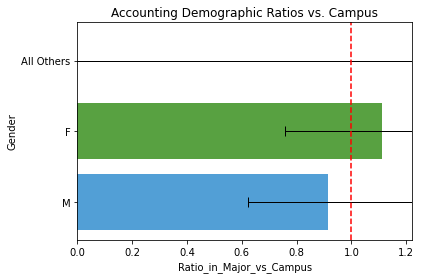

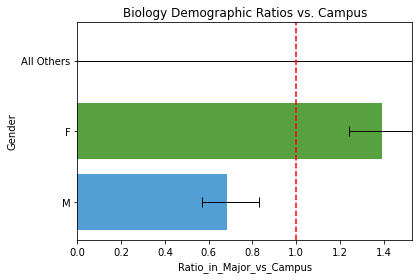

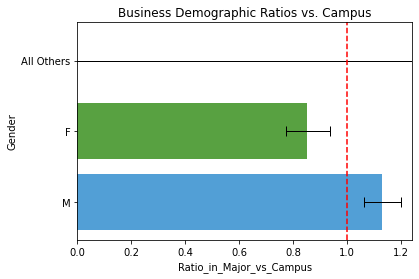

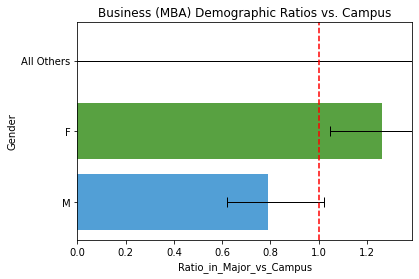

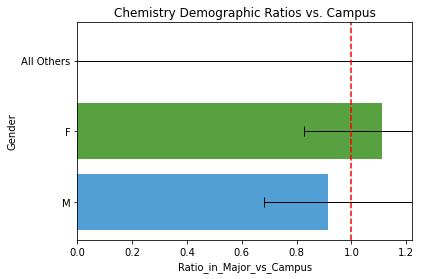

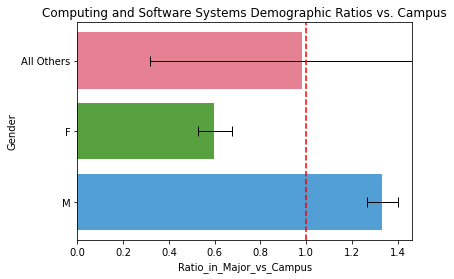

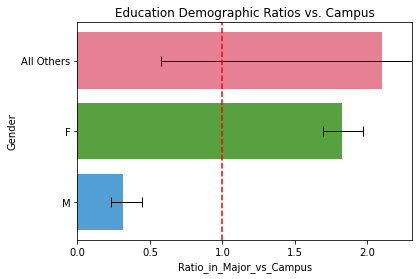

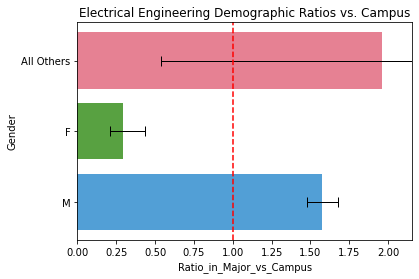

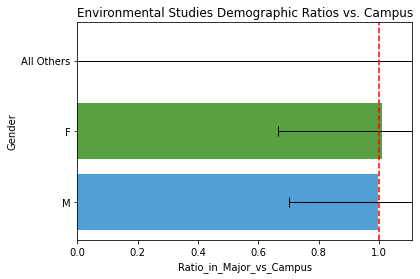

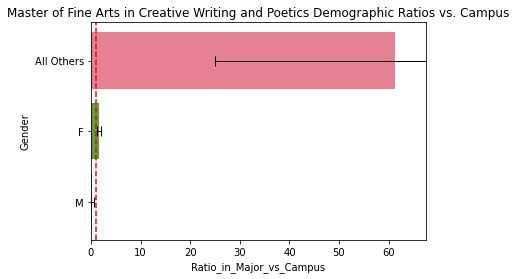

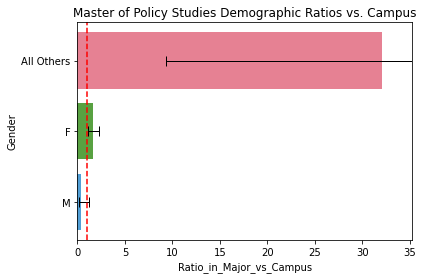

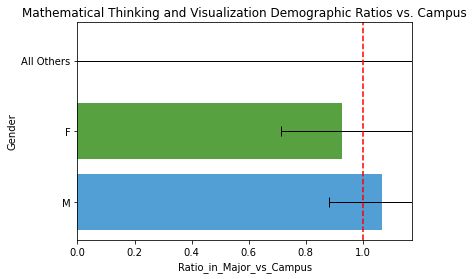

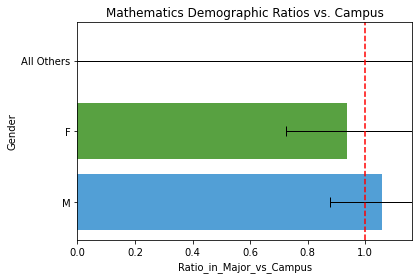

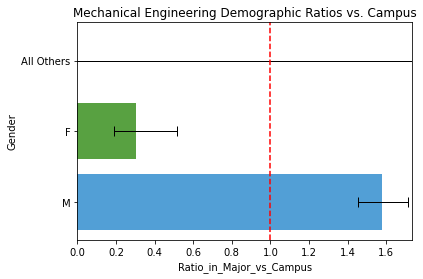

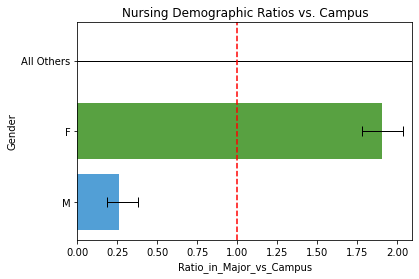

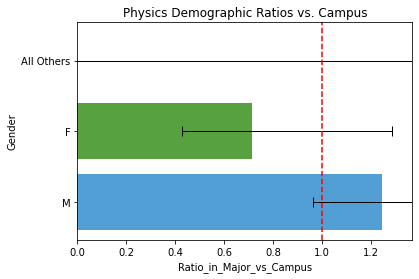

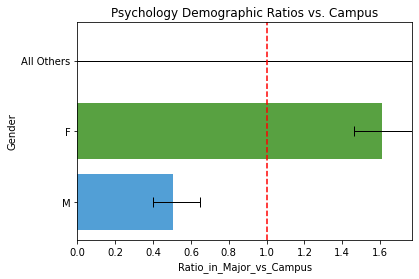

Plotting major: Nursing


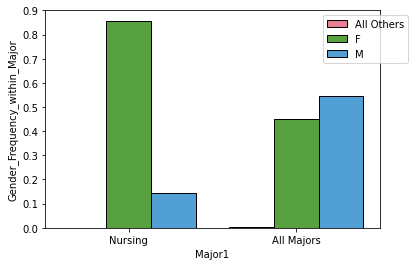

Plotting major: Business (MBA)


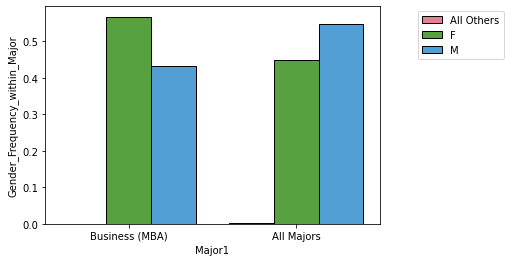

Plotting major: Biology


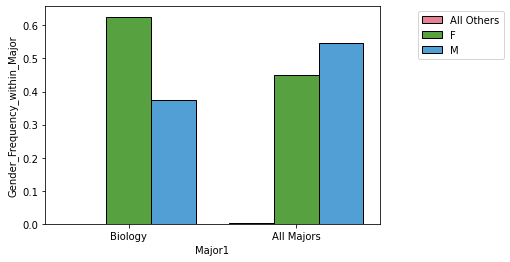

Plotting major: Psychology


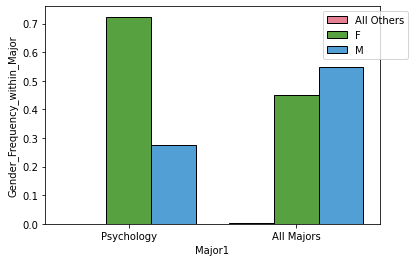

Plotting major: Chemistry


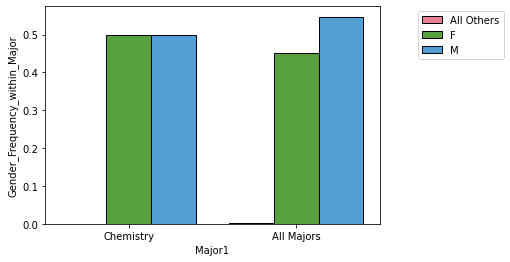

Plotting major: Master of Policy Studies


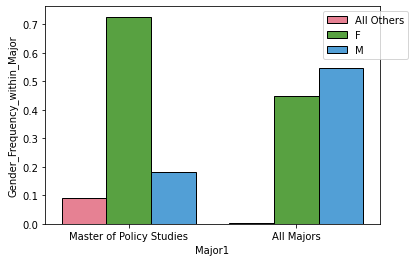

Plotting major: Mathematics


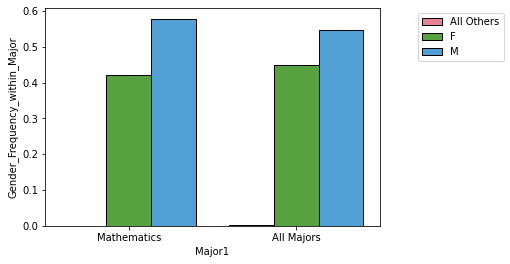

Plotting major: Mathematical Thinking and Visualization


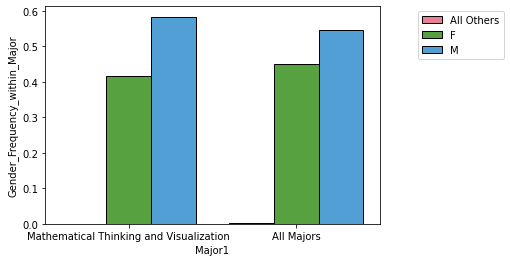

Plotting major: Computing and Software Systems


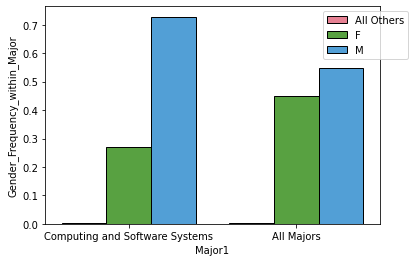

Plotting major: Environmental Studies


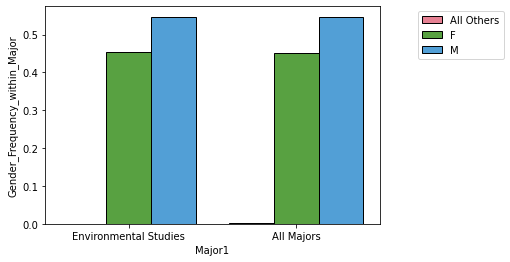

Plotting major: Accounting


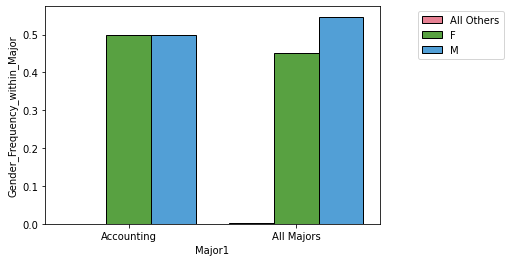

Plotting major: Master of Fine Arts in Creative Writing and Poetics


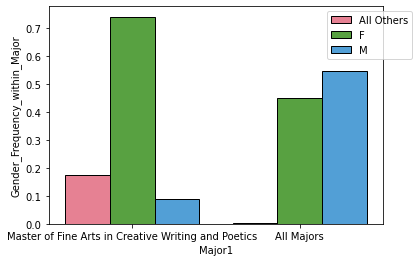

Plotting major: Physics


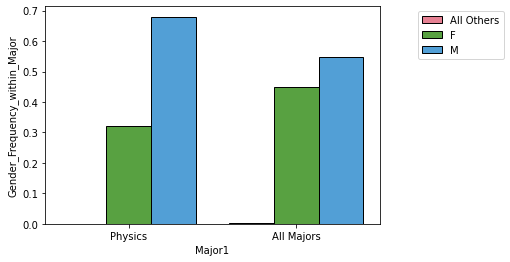

Plotting major: Electrical Engineering


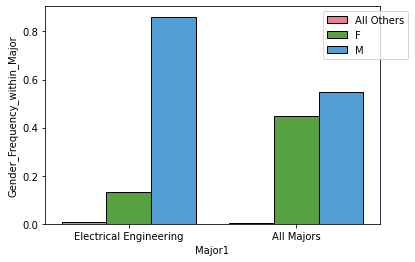

Plotting major: Business


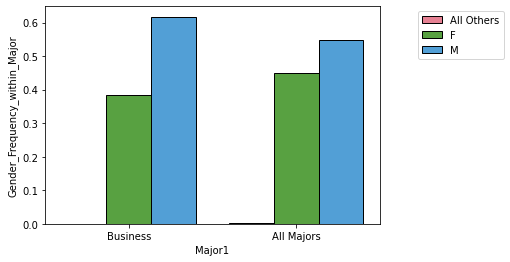

Plotting major: Education


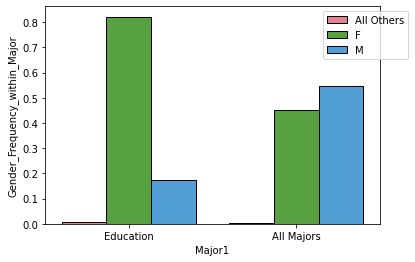

Plotting major: All Majors


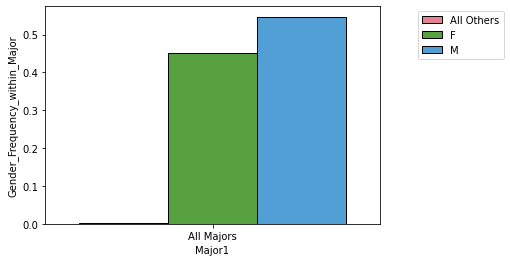

Plotting major: Mechanical Engineering


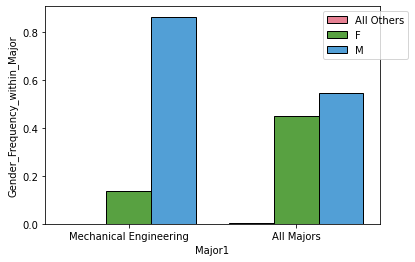

Generating plots for Ethnicity_Race
Saving raw count data to ../output/student_data_spring_2023/Ethnicity_Race_count_summary.csv


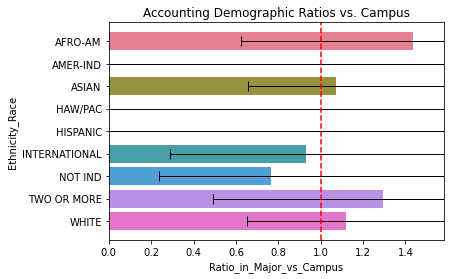

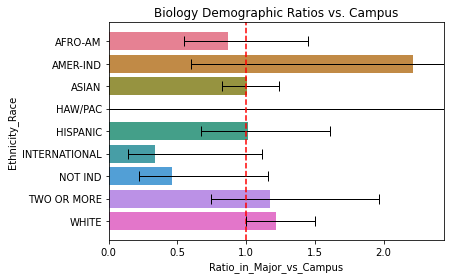

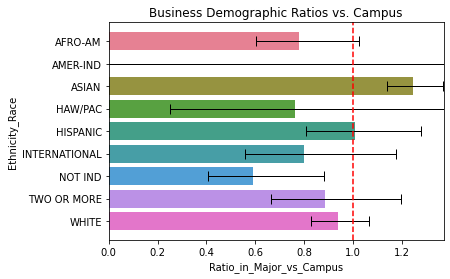

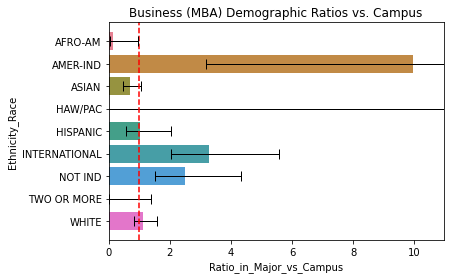

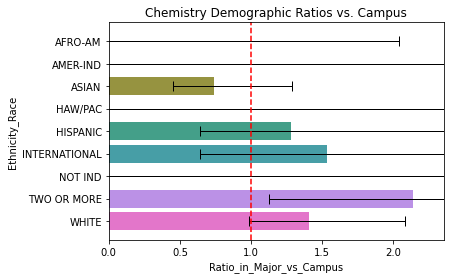

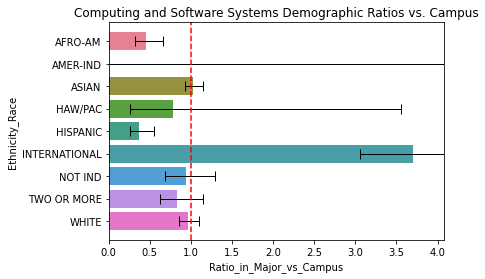

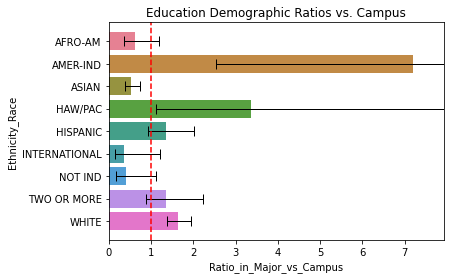

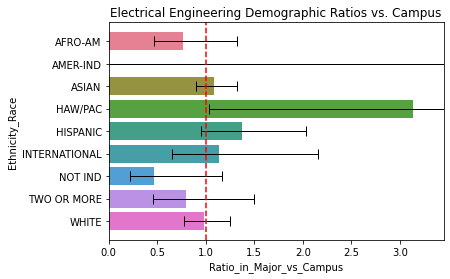

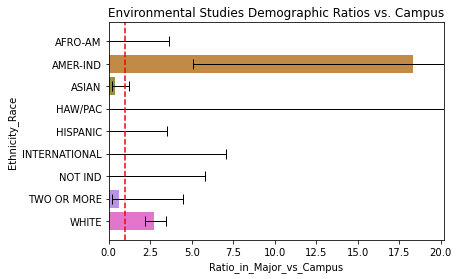

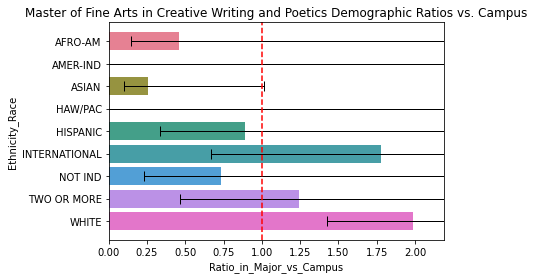

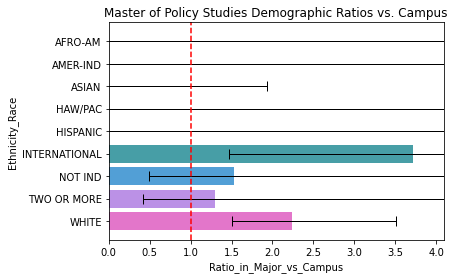

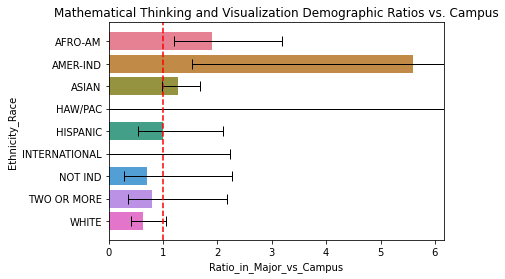

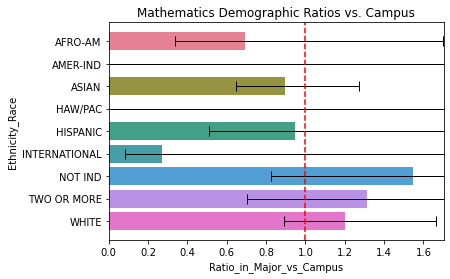

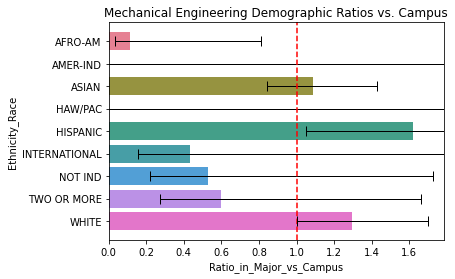

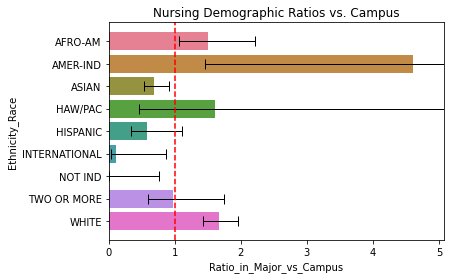

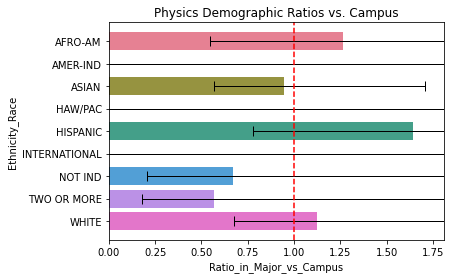

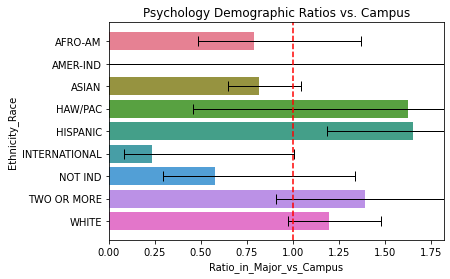

Plotting major: Nursing


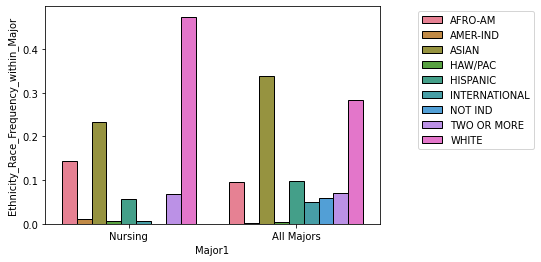

Plotting major: Business (MBA)


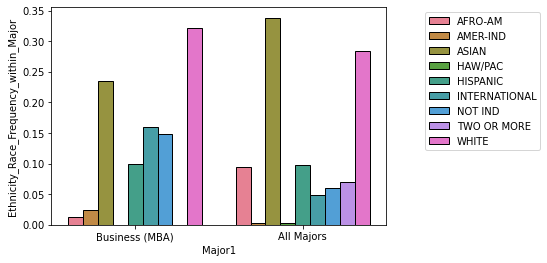

Plotting major: Biology


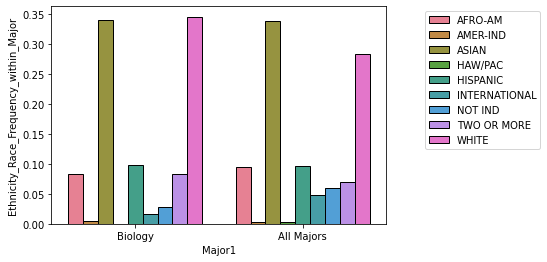

Plotting major: Psychology


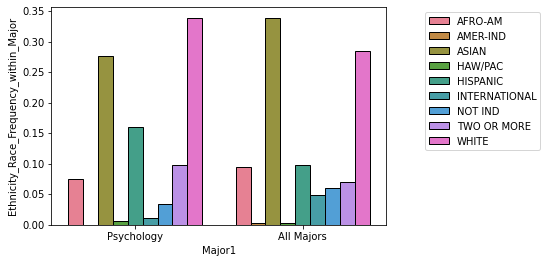

Plotting major: Chemistry


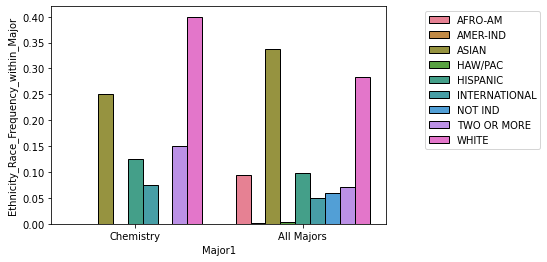

Plotting major: Master of Policy Studies


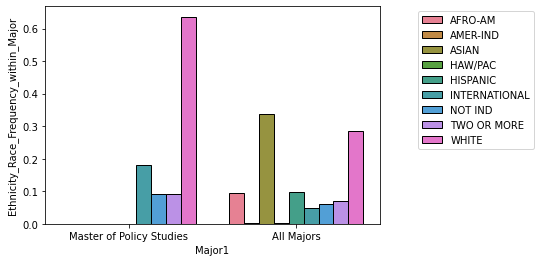

Plotting major: Mathematics


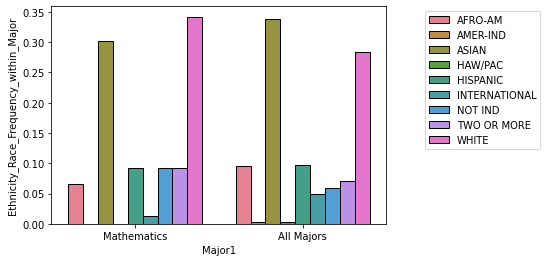

Plotting major: Mathematical Thinking and Visualization


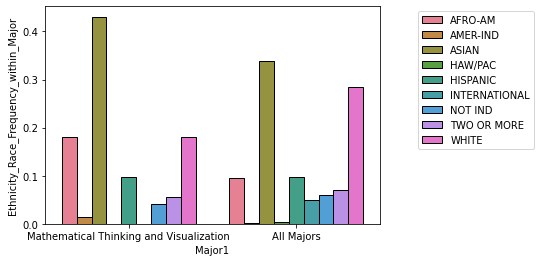

Plotting major: Computing and Software Systems


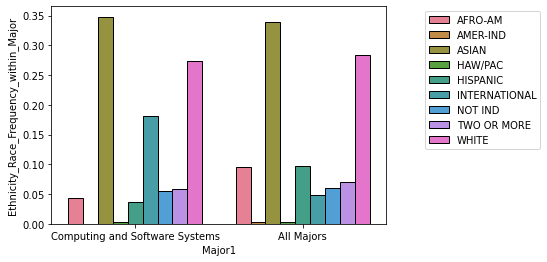

Plotting major: Environmental Studies


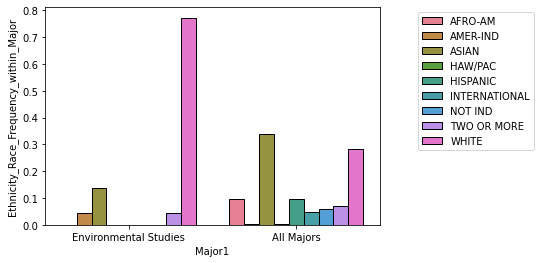

Plotting major: Accounting


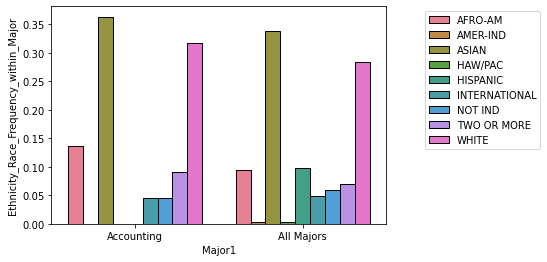

Plotting major: Master of Fine Arts in Creative Writing and Poetics


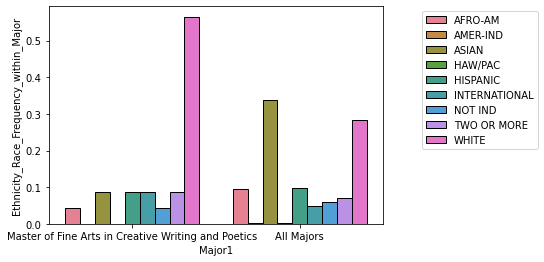

Plotting major: Physics


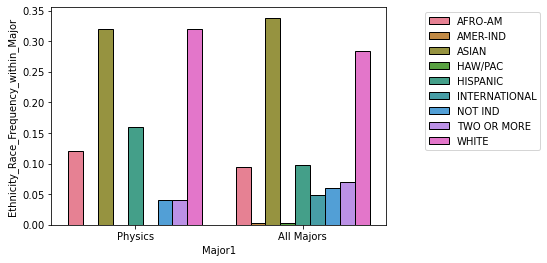

Plotting major: Electrical Engineering


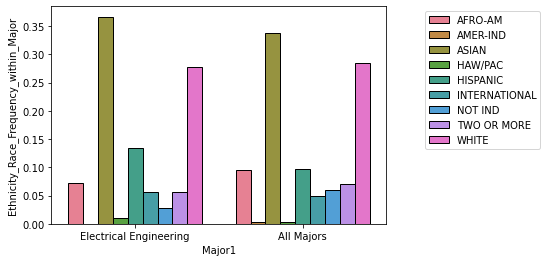

Plotting major: Business


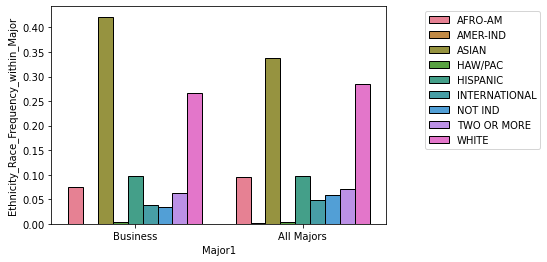

Plotting major: Education


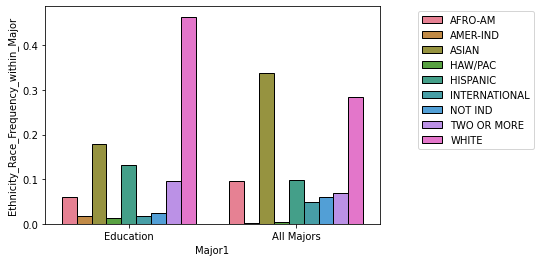

Plotting major: All Majors


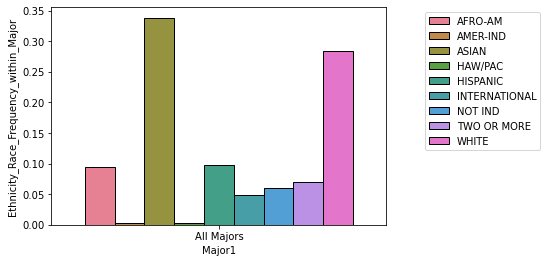

Plotting major: Mechanical Engineering


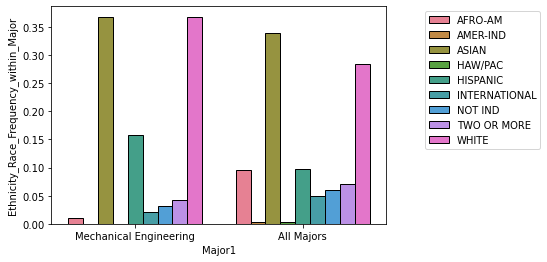

Generating plots for Underrepresented
Saving raw count data to ../output/student_data_spring_2023/Underrepresented_count_summary.csv


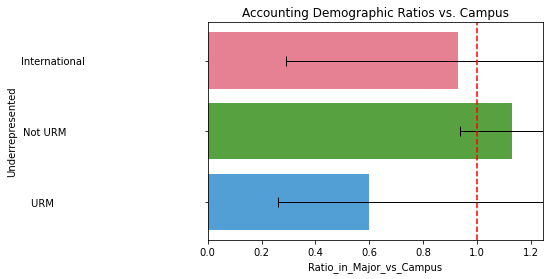

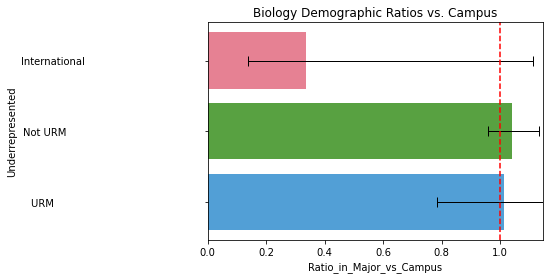

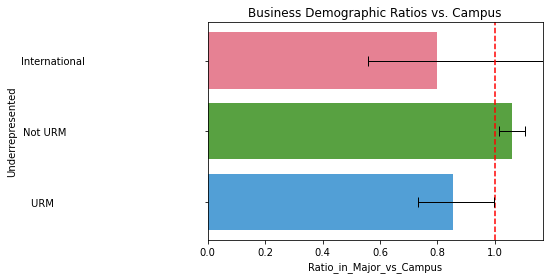

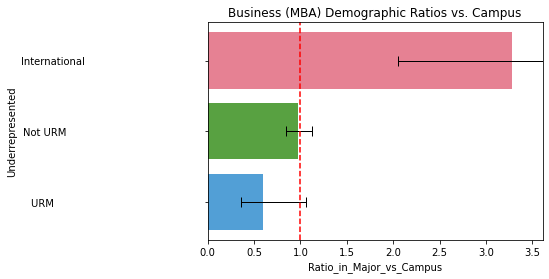

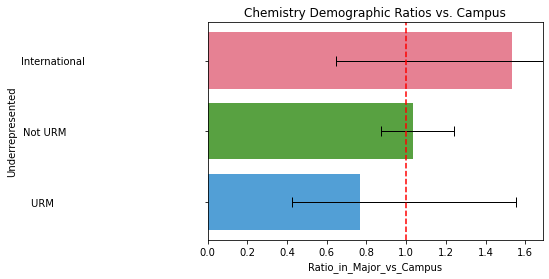

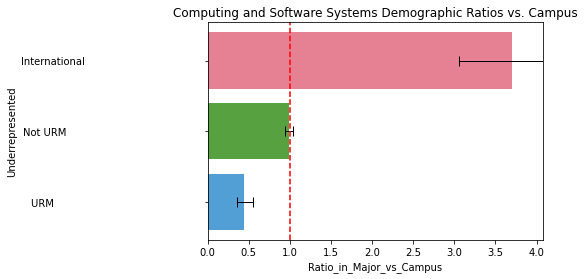

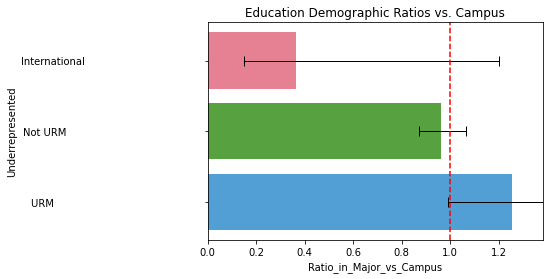

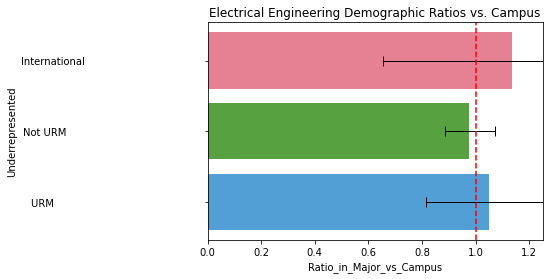

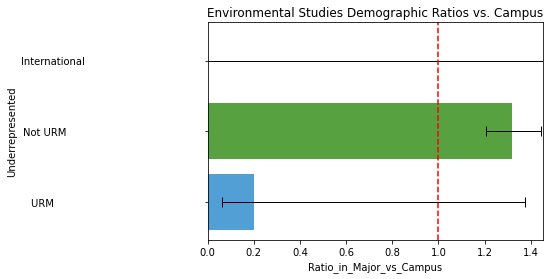

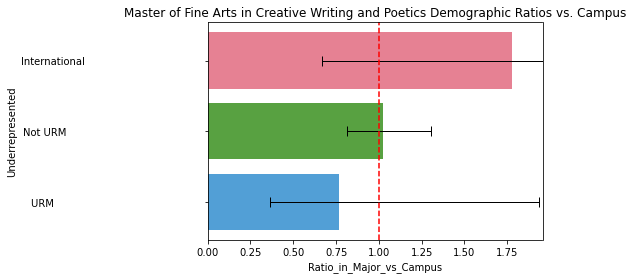

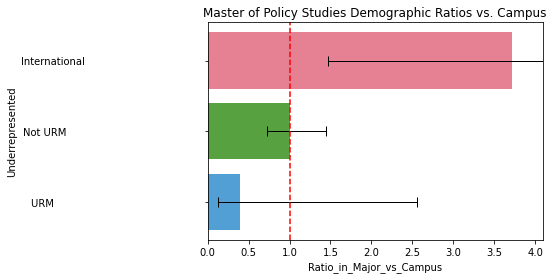

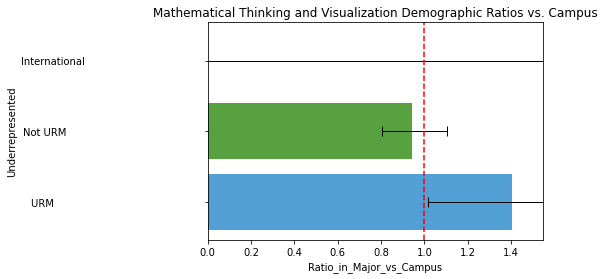

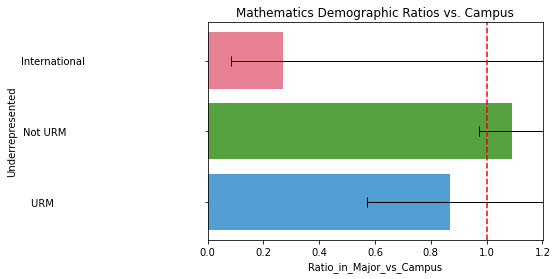

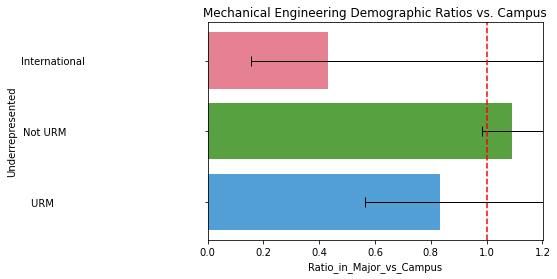

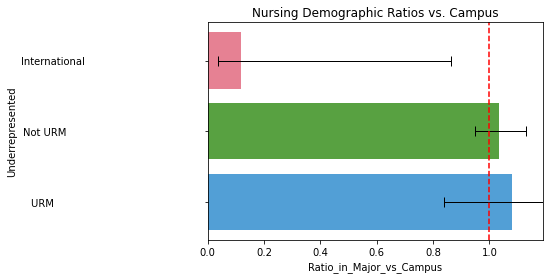

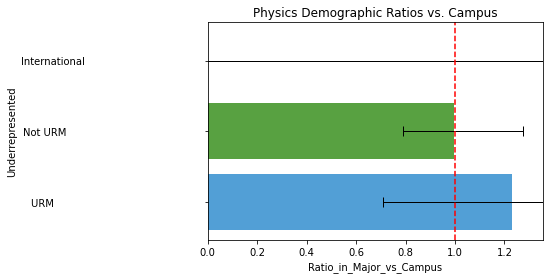

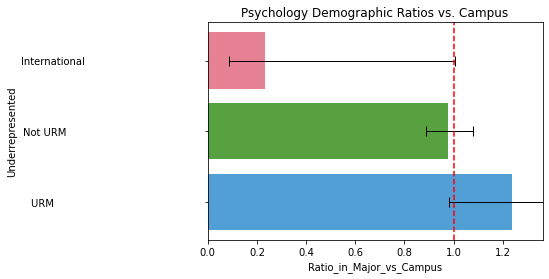

Plotting major: Nursing


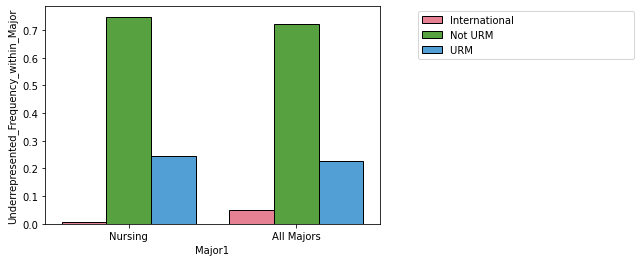

Plotting major: Business (MBA)


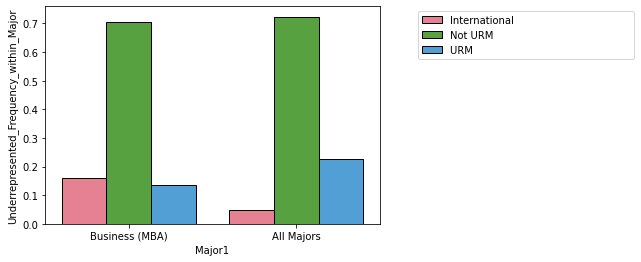

Plotting major: Biology


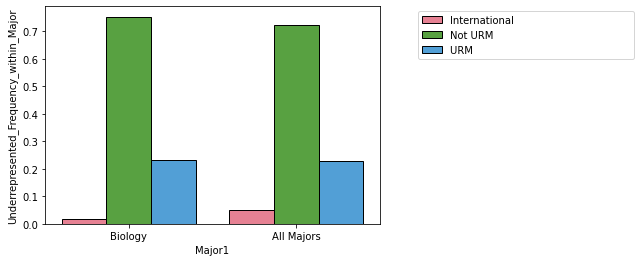

Plotting major: Psychology


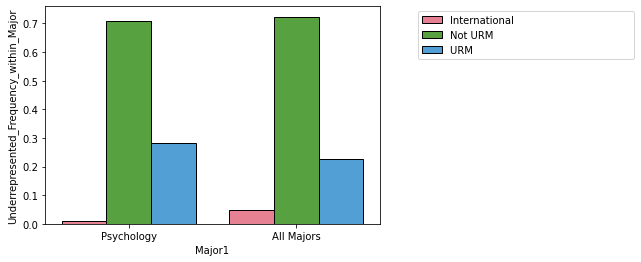

Plotting major: Chemistry


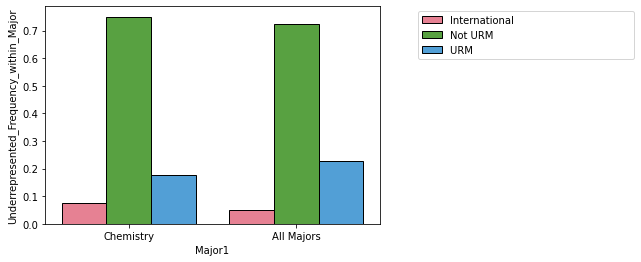

Plotting major: Master of Policy Studies


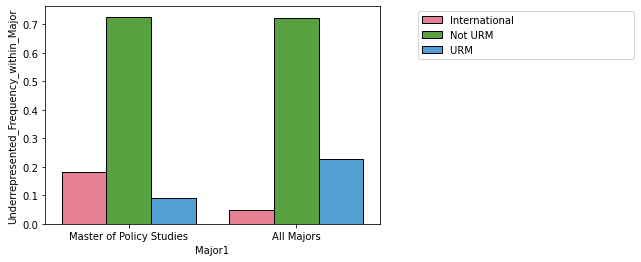

Plotting major: Mathematics


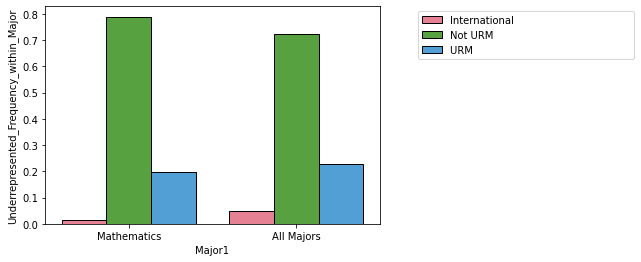

Plotting major: Mathematical Thinking and Visualization


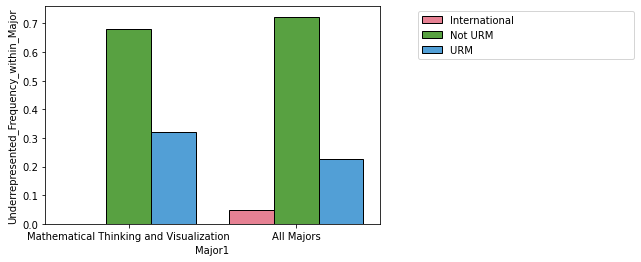

Plotting major: Computing and Software Systems


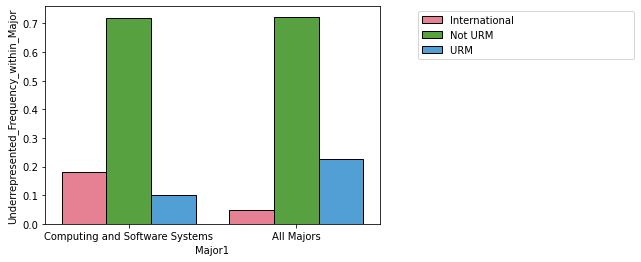

Plotting major: Environmental Studies


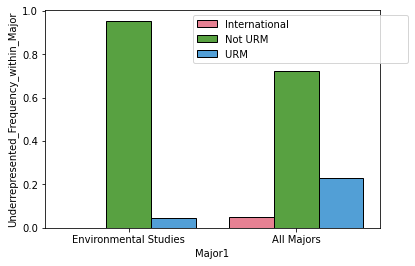

Plotting major: Accounting


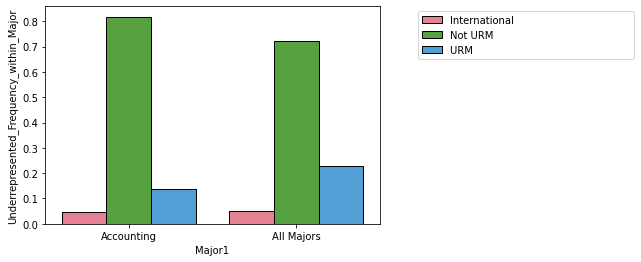

Plotting major: Master of Fine Arts in Creative Writing and Poetics


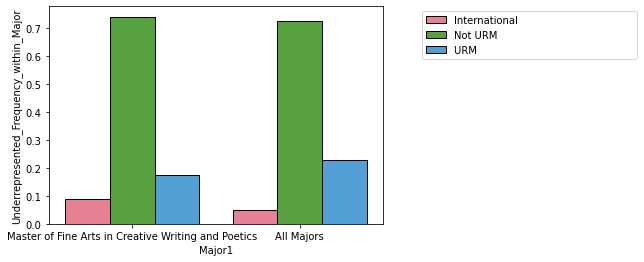

Plotting major: Physics


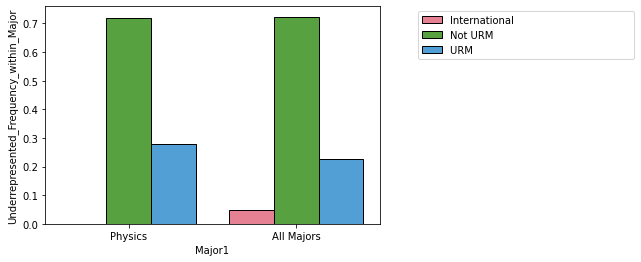

Plotting major: Electrical Engineering


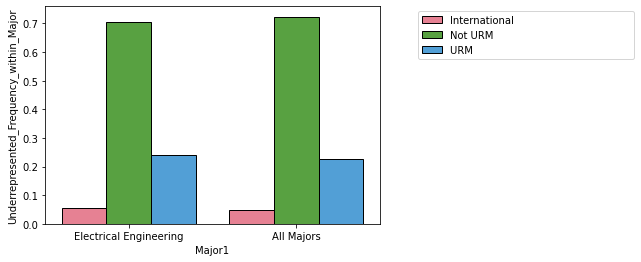

Plotting major: Business


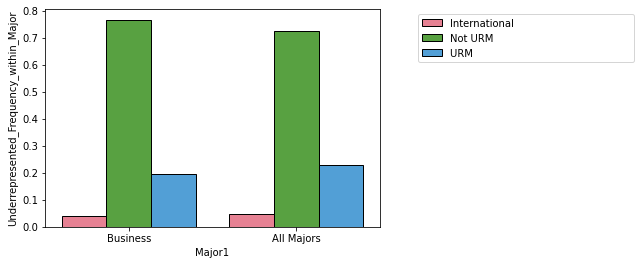

Plotting major: Education


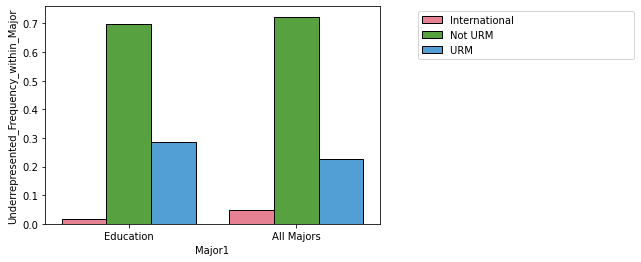

Plotting major: All Majors


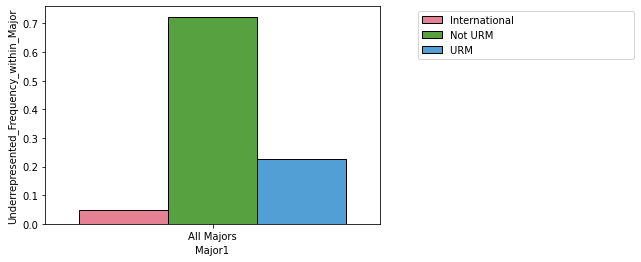

Plotting major: Mechanical Engineering


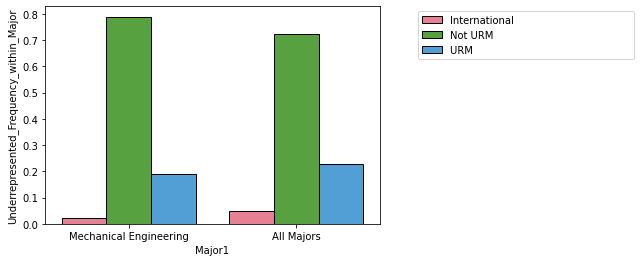

Generating plots for First_Generation
Zero counts prevent generating this data...skipping
Generating plots for First_Generation_4_Yr
Saving raw count data to ../output/student_data_spring_2023/First_Generation_4_Yr_count_summary.csv


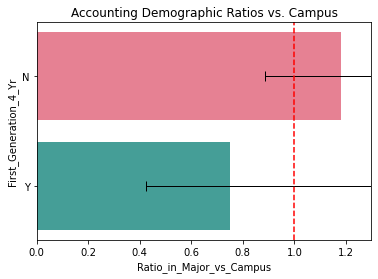

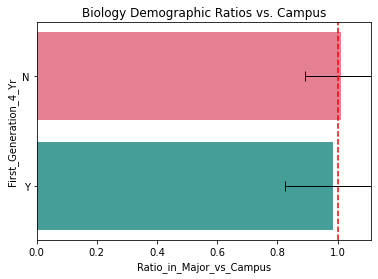

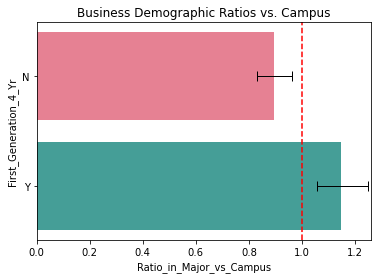

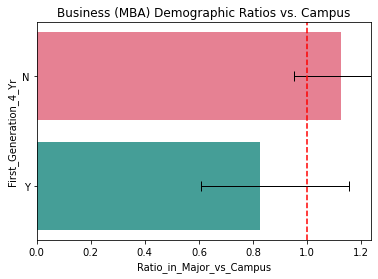

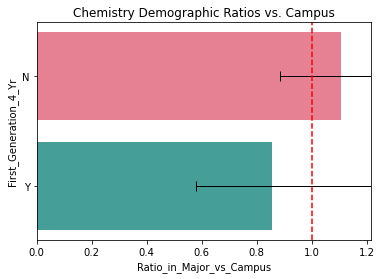

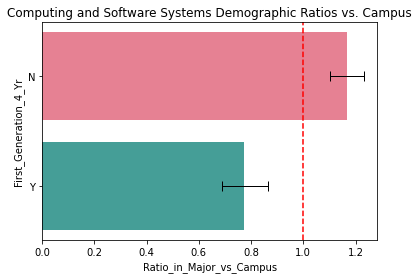

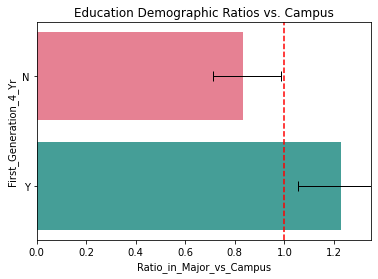

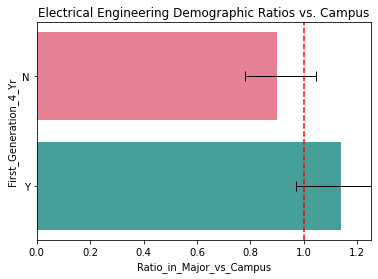

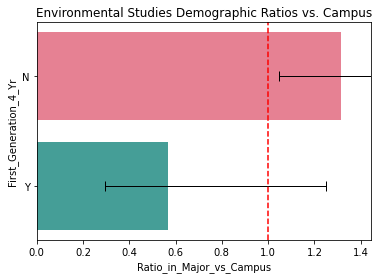

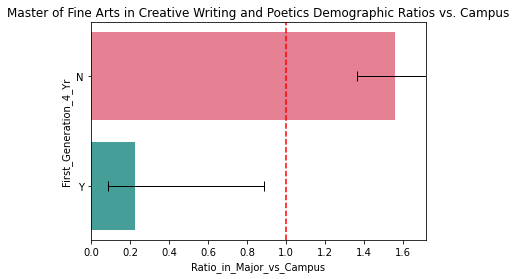

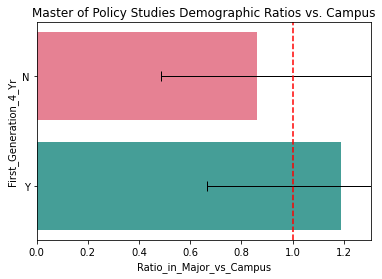

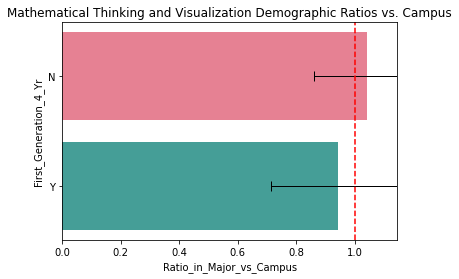

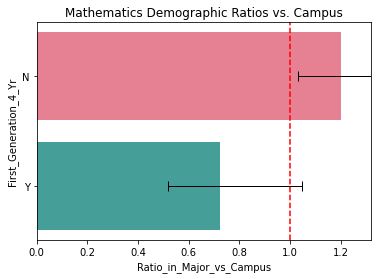

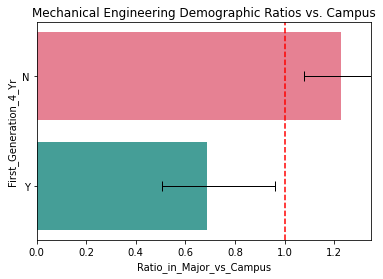

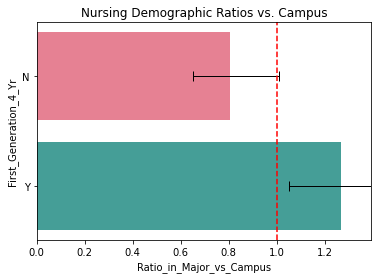

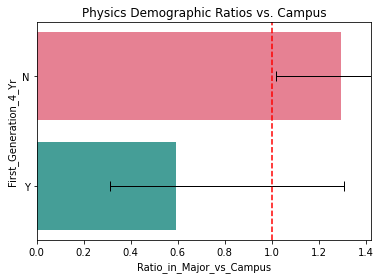

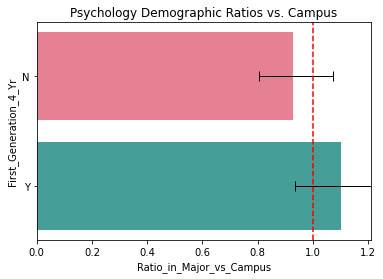

Plotting major: Nursing


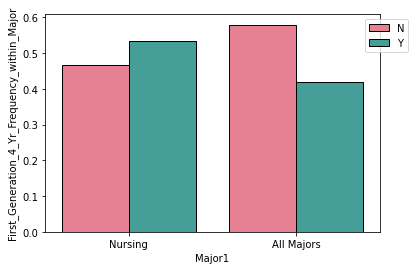

Plotting major: Business (MBA)


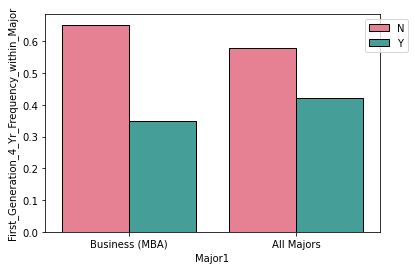

Plotting major: Biology


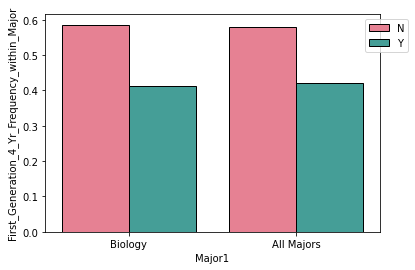

Plotting major: Psychology


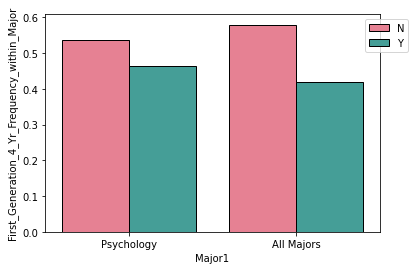

Plotting major: Chemistry


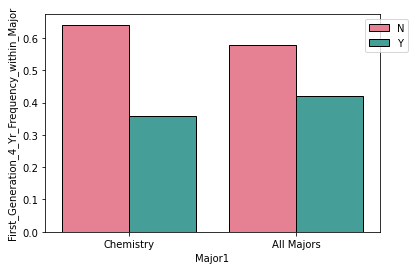

Plotting major: Master of Policy Studies


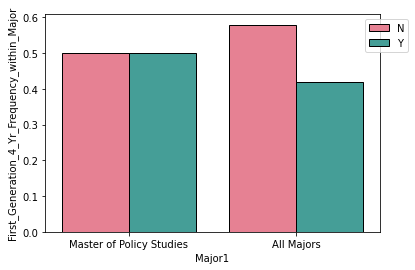

Plotting major: Mathematics


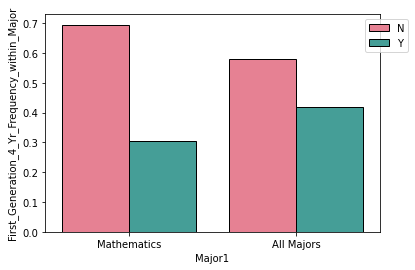

Plotting major: Mathematical Thinking and Visualization


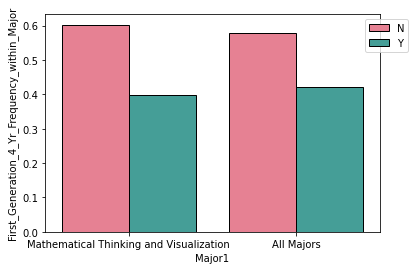

Plotting major: Computing and Software Systems


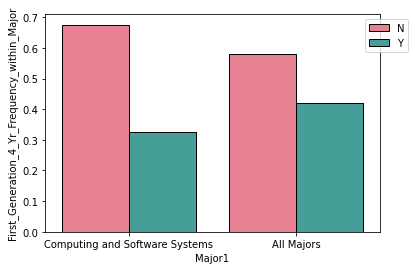

Plotting major: Environmental Studies


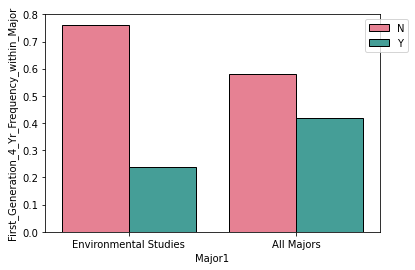

Plotting major: Accounting


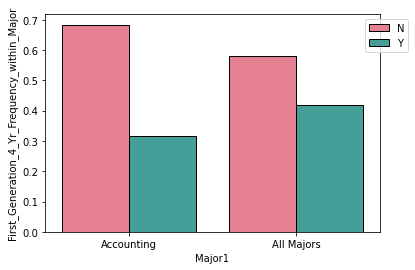

Plotting major: Master of Fine Arts in Creative Writing and Poetics


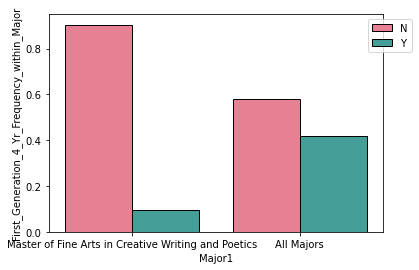

Plotting major: Physics


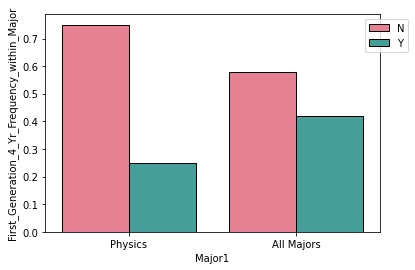

Plotting major: Electrical Engineering


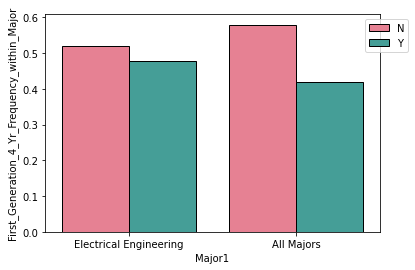

Plotting major: Business


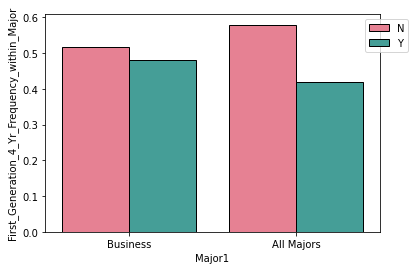

Plotting major: Education


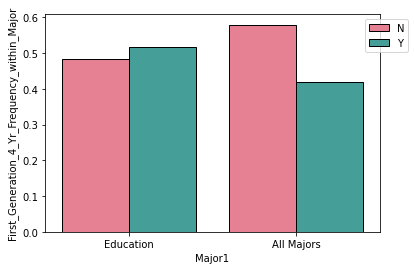

Plotting major: All Majors


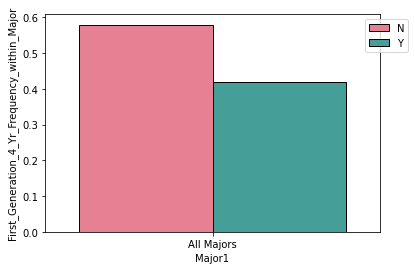

Plotting major: Mechanical Engineering


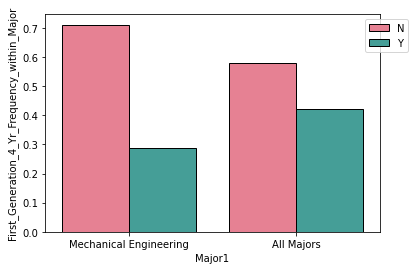

Generating plots for Veteran
Saving raw count data to ../output/student_data_spring_2023/Veteran_count_summary.csv


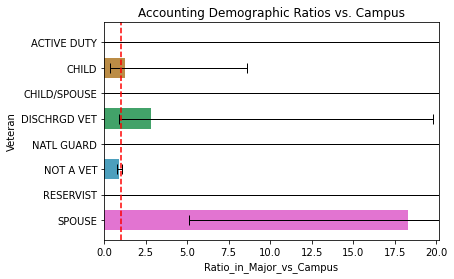

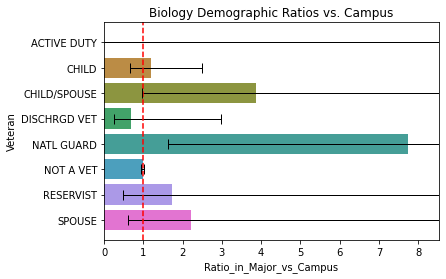

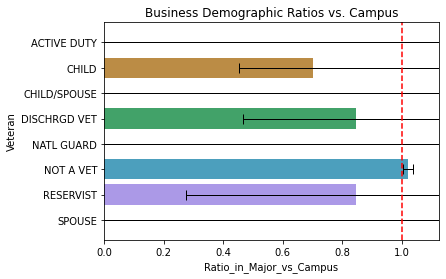

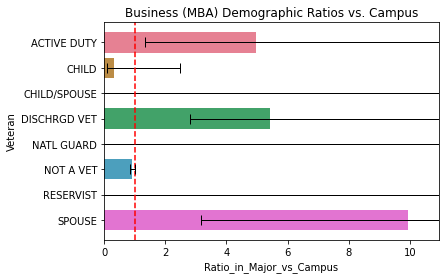

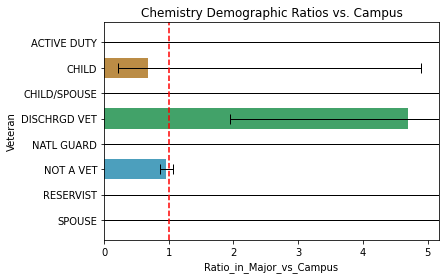

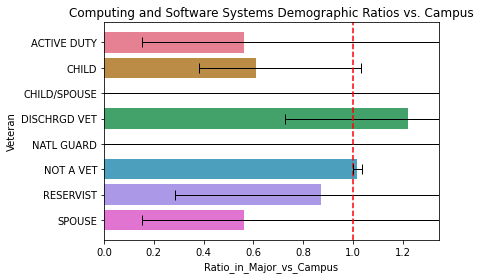

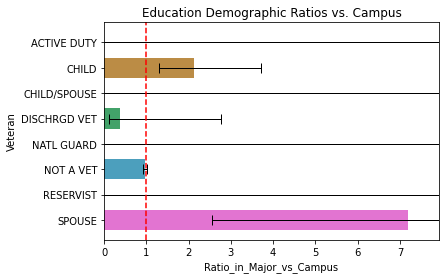

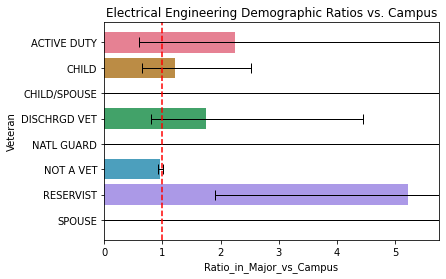

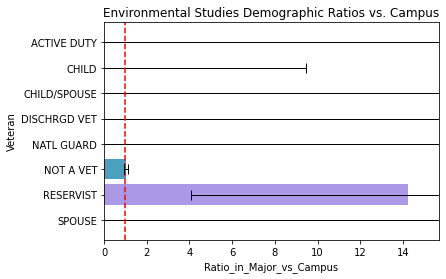

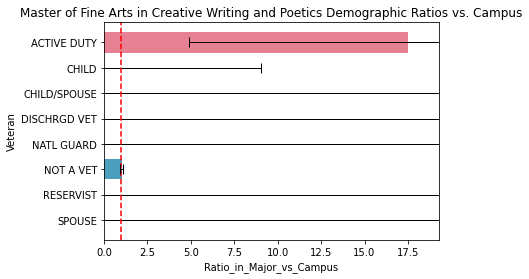

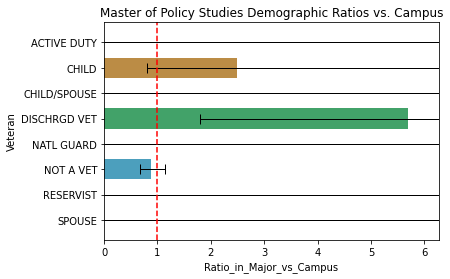

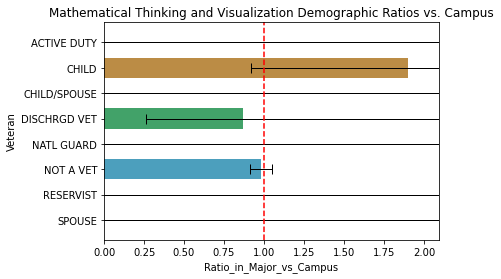

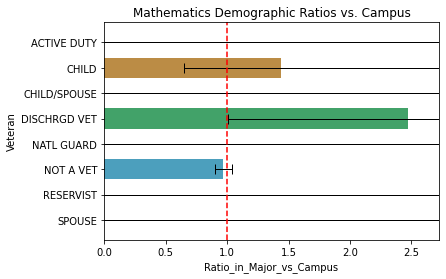

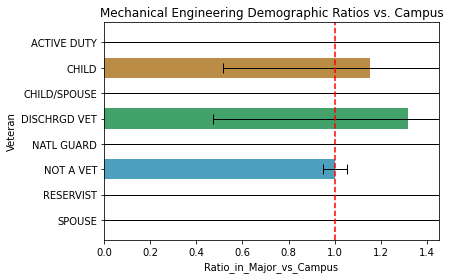

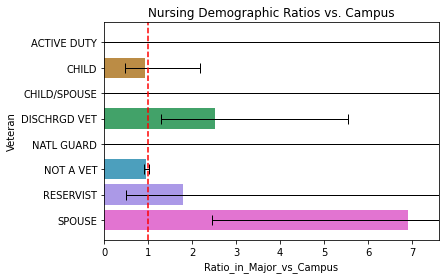

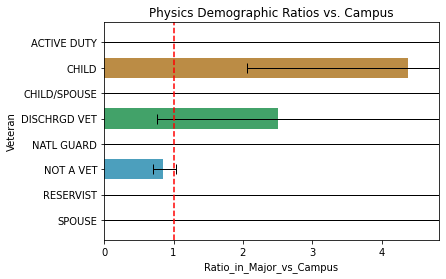

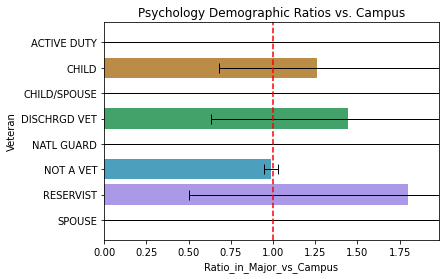

Plotting major: Nursing


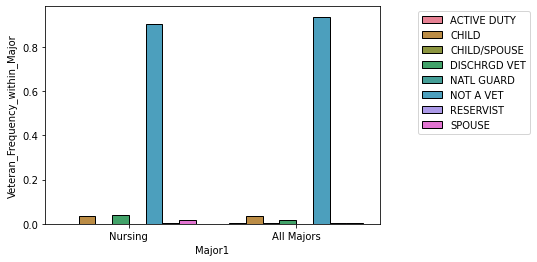

Plotting major: Business (MBA)


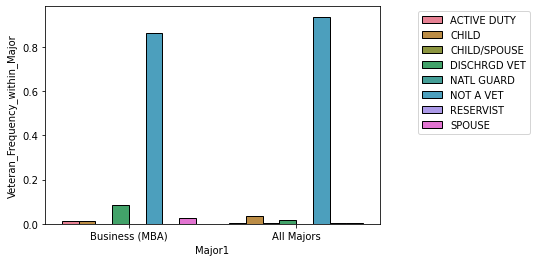

Plotting major: Biology


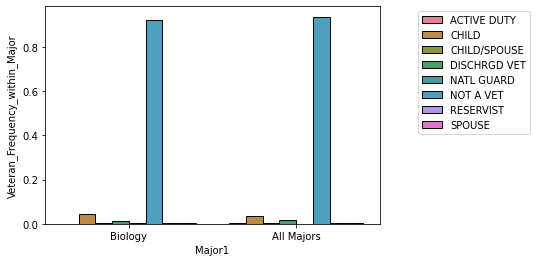

Plotting major: Psychology


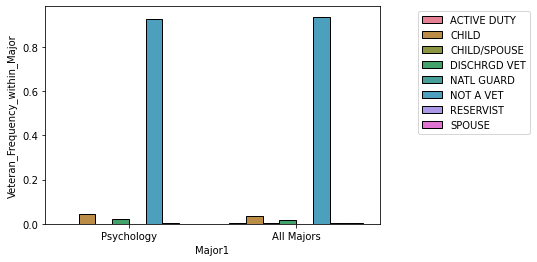

Plotting major: Chemistry


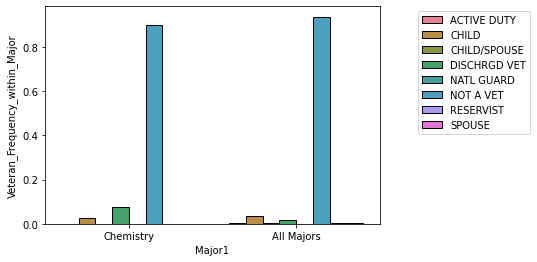

Plotting major: Master of Policy Studies


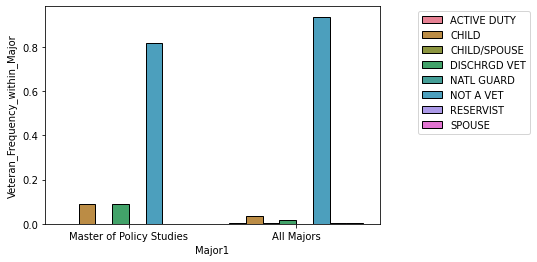

Plotting major: Mathematics


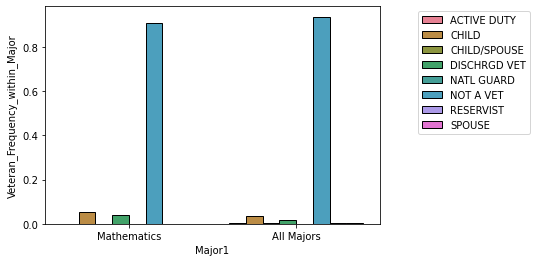

Plotting major: Mathematical Thinking and Visualization


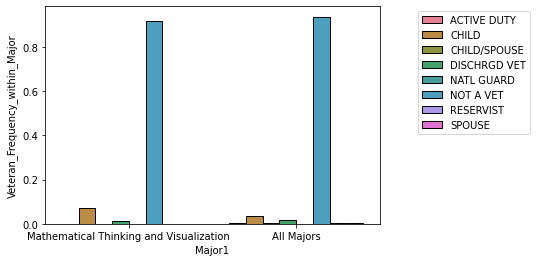

Plotting major: Computing and Software Systems


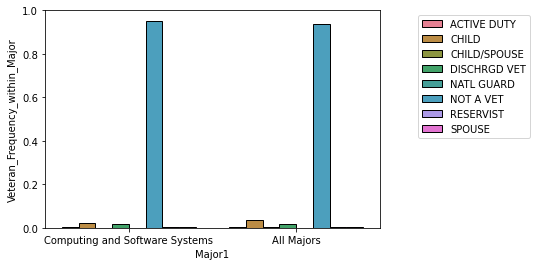

Plotting major: Environmental Studies


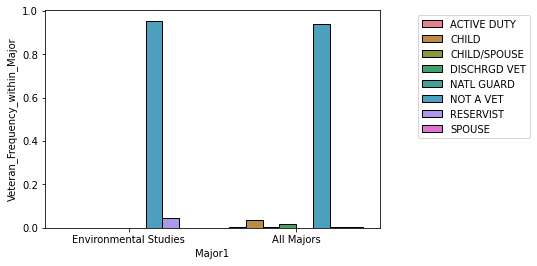

Plotting major: Accounting


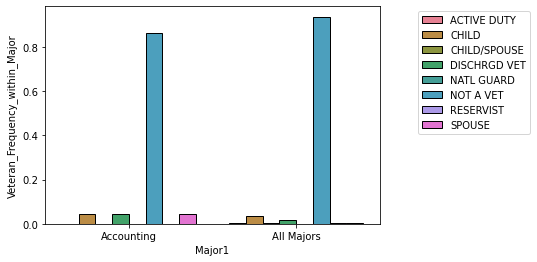

Plotting major: Master of Fine Arts in Creative Writing and Poetics


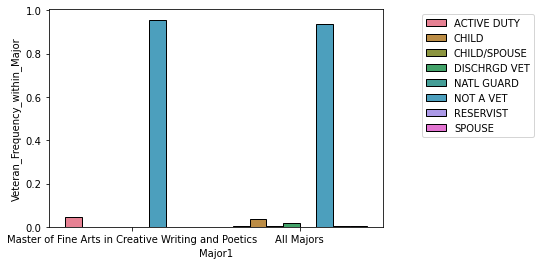

Plotting major: Physics


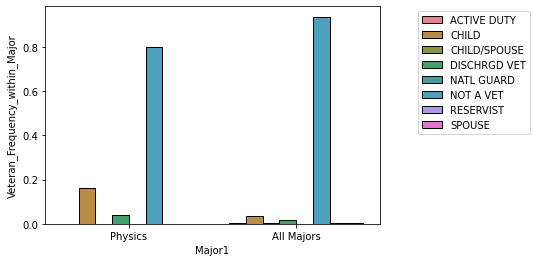

Plotting major: Electrical Engineering


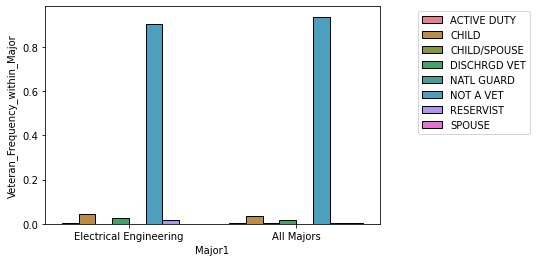

Plotting major: Business


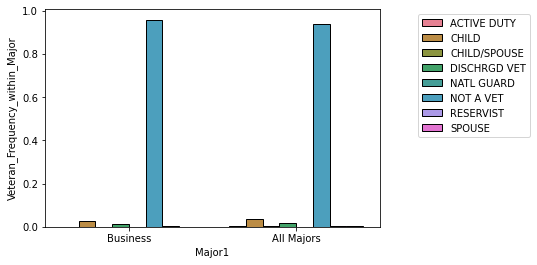

Plotting major: Education


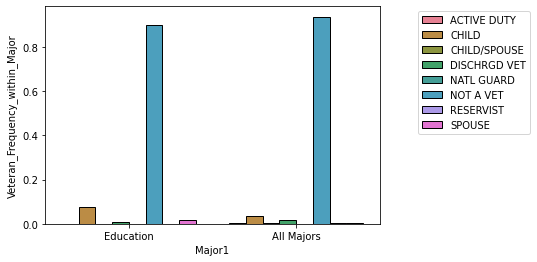

Plotting major: All Majors


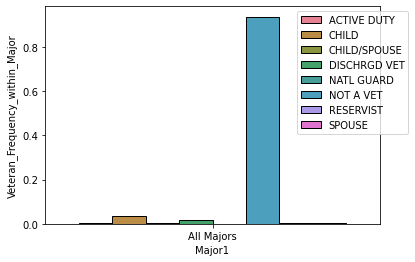

Plotting major: Mechanical Engineering


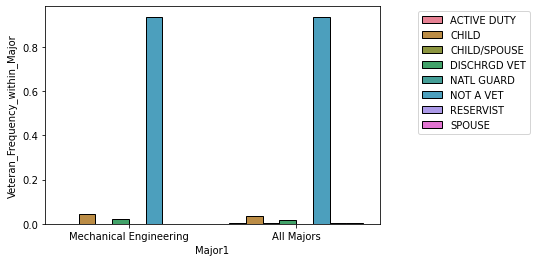

Analyzing Major_Codes_autumn_2023.csv...
Major_Codes_autumn_2023.csv is not a student data file ... skipping
Analyzing student_data_winter_2023.csv...
Creating analysis directory: ../output/student_data_winter_2023
Generating plots for Gender
Saving raw count data to ../output/student_data_winter_2023/Gender_count_summary.csv


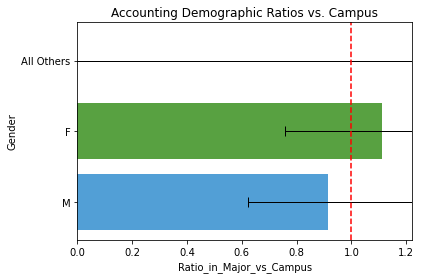

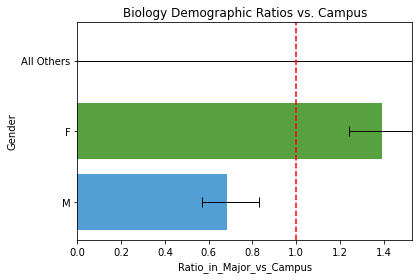

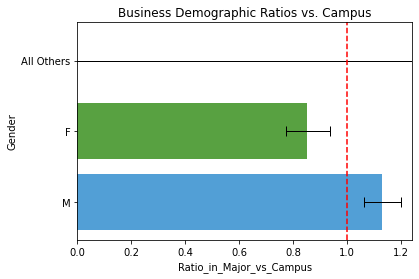

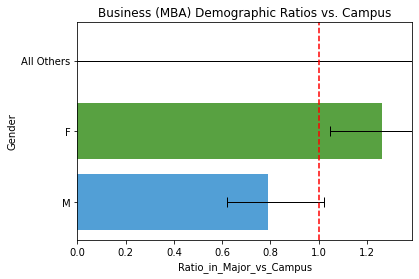

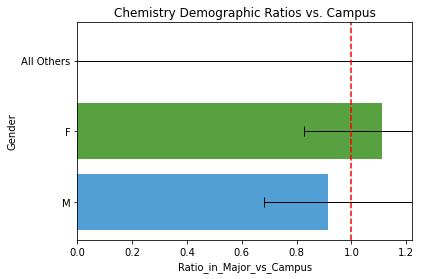

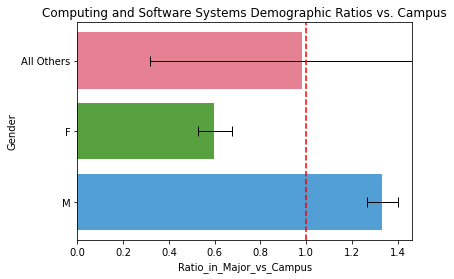

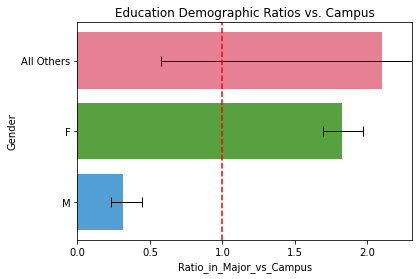

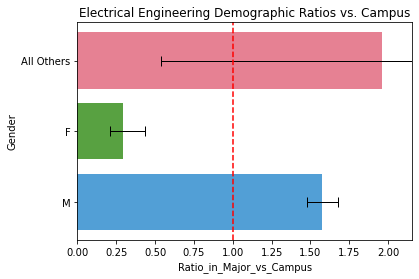

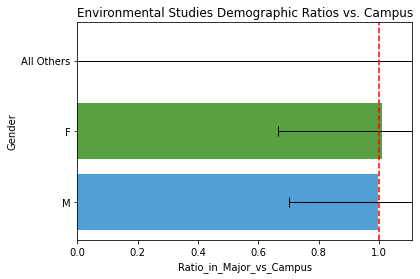

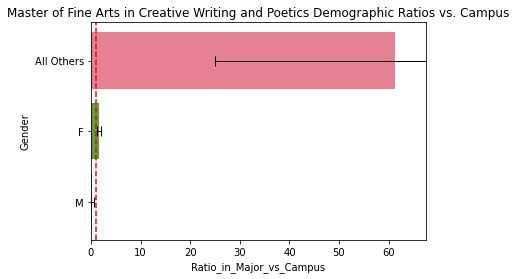

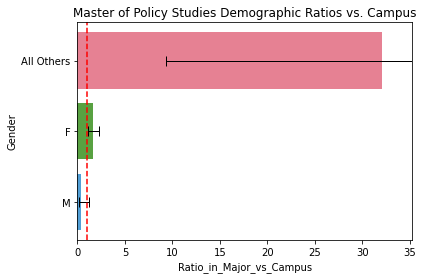

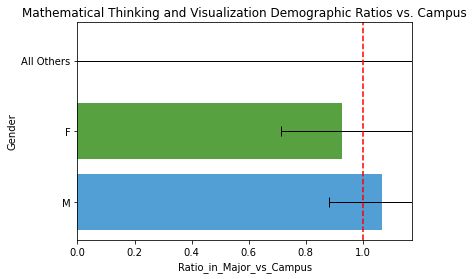

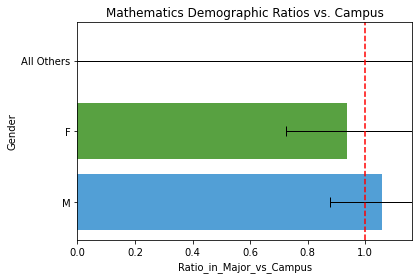

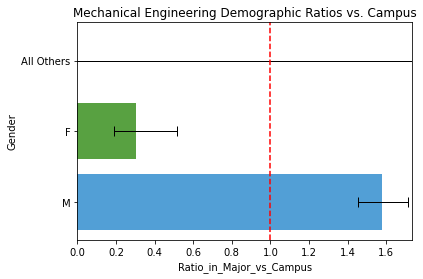

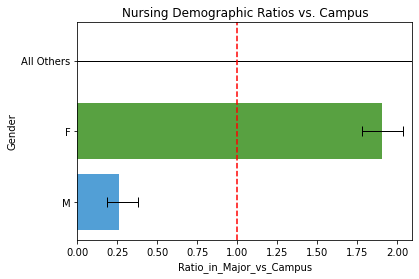

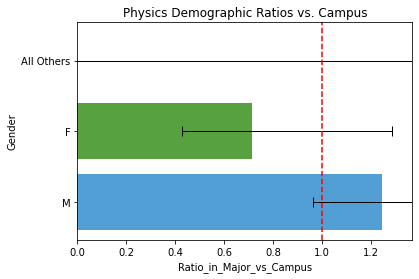

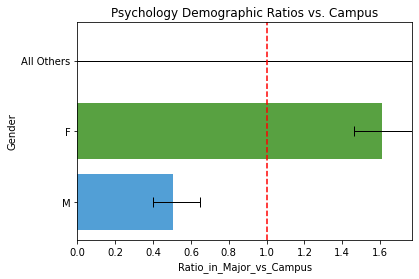

Plotting major: Nursing


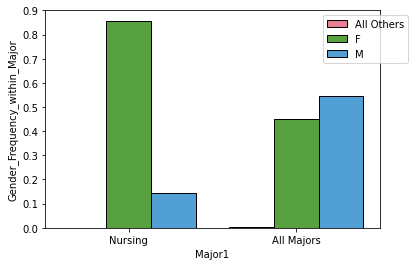

Plotting major: Business (MBA)


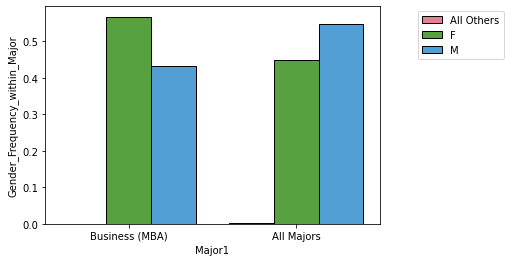

Plotting major: Biology


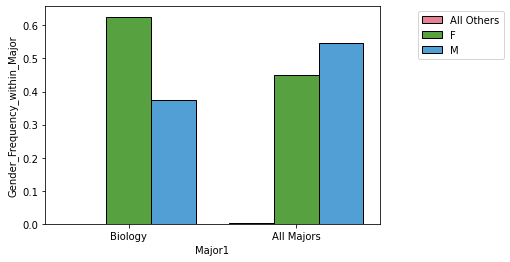

Plotting major: Psychology


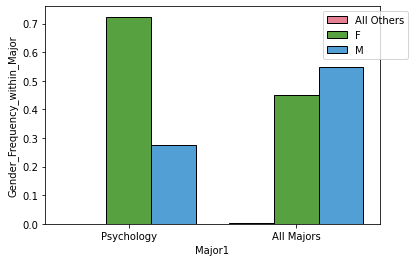

Plotting major: Chemistry


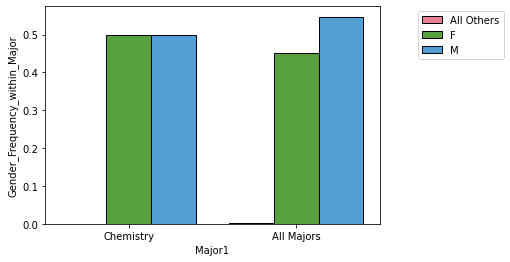

Plotting major: Master of Policy Studies


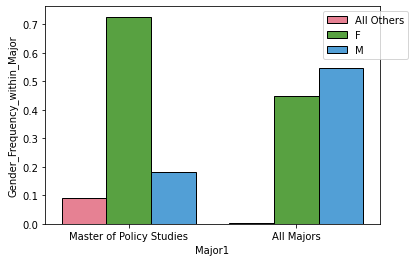

Plotting major: Mathematics


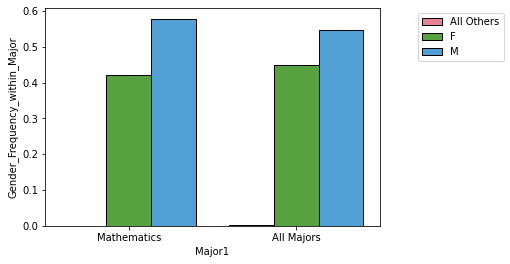

Plotting major: Mathematical Thinking and Visualization


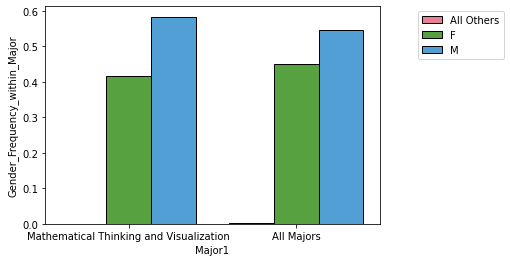

Plotting major: Computing and Software Systems


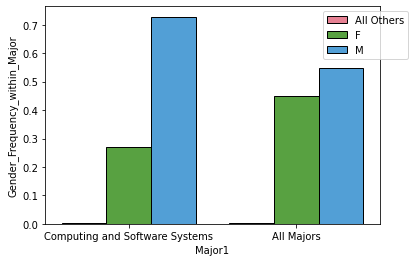

Plotting major: Environmental Studies


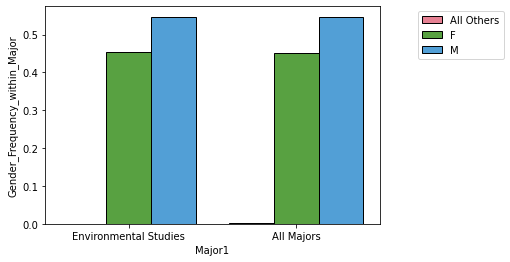

Plotting major: Accounting


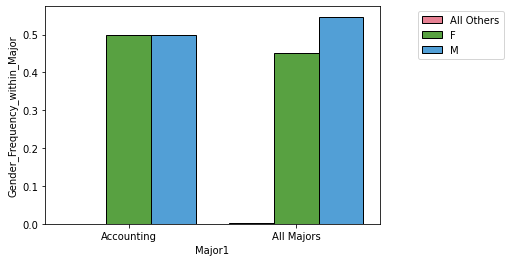

Plotting major: Master of Fine Arts in Creative Writing and Poetics


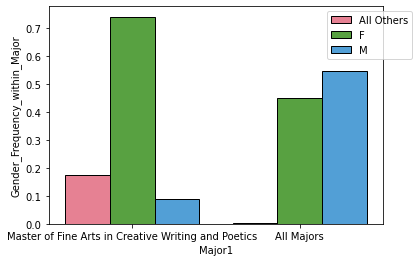

Plotting major: Physics


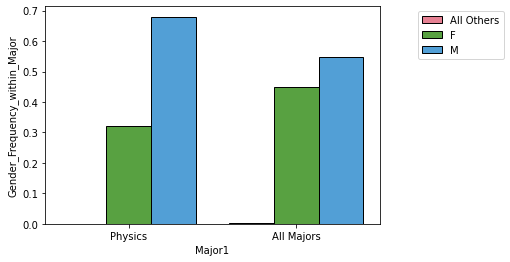

Plotting major: Electrical Engineering


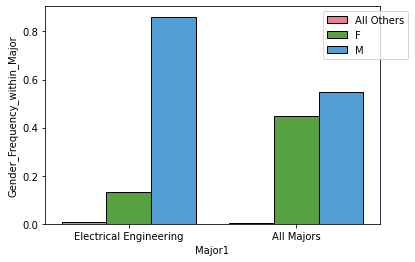

Plotting major: Business


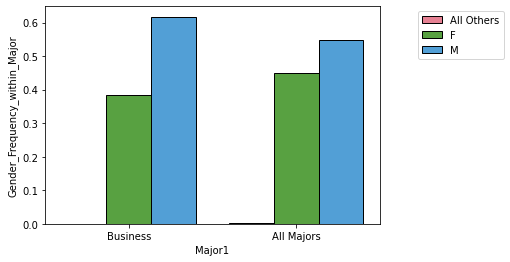

Plotting major: Education


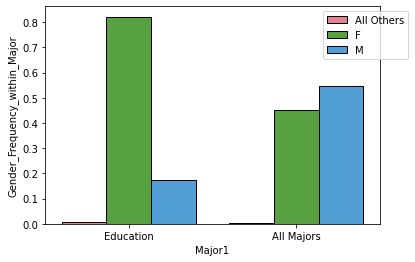

Plotting major: All Majors


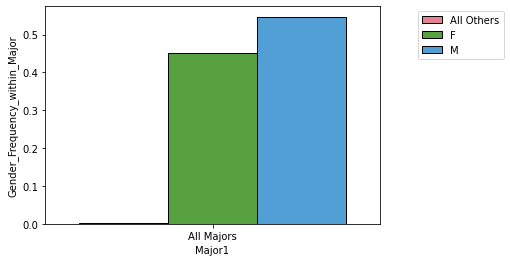

Plotting major: Mechanical Engineering


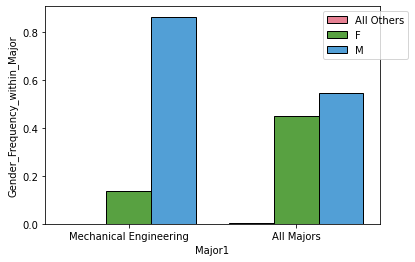

Generating plots for Ethnicity_Race
Saving raw count data to ../output/student_data_winter_2023/Ethnicity_Race_count_summary.csv


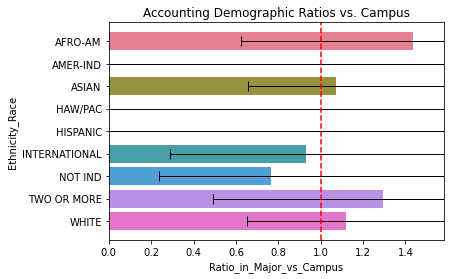

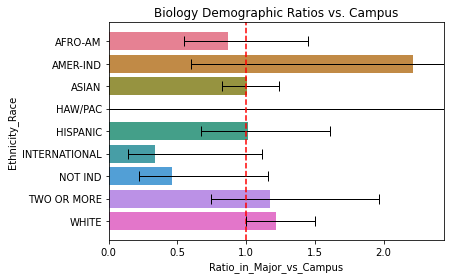

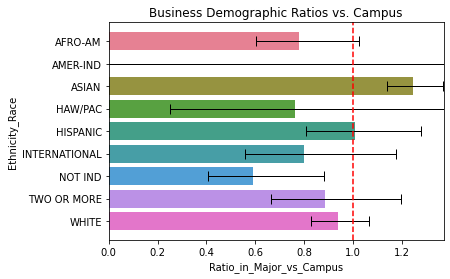

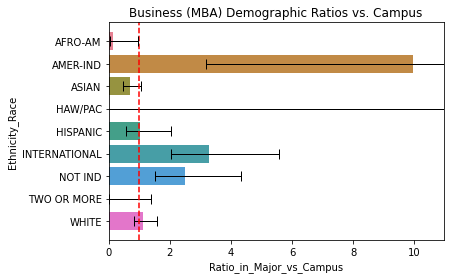

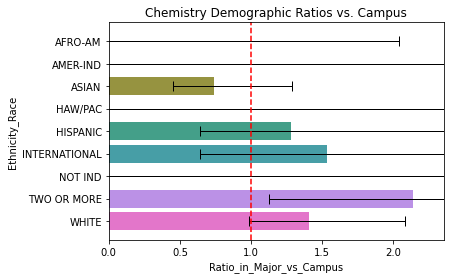

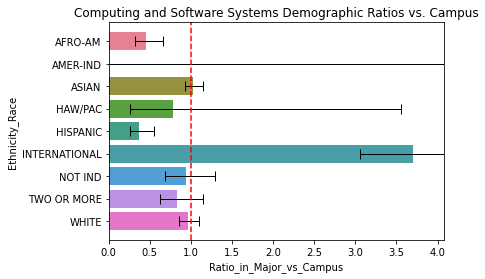

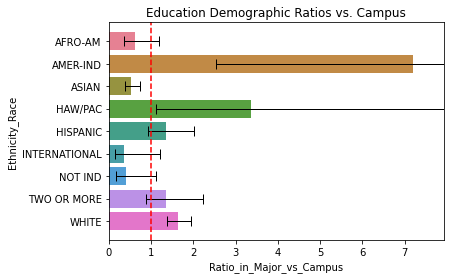

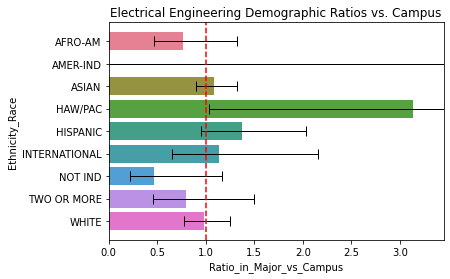

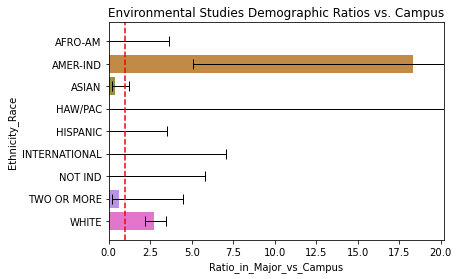

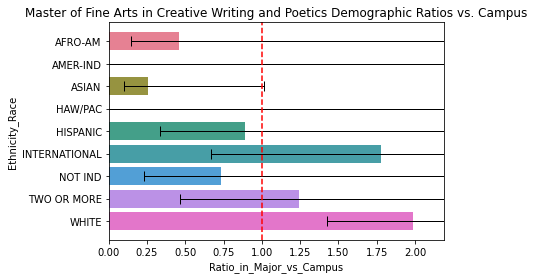

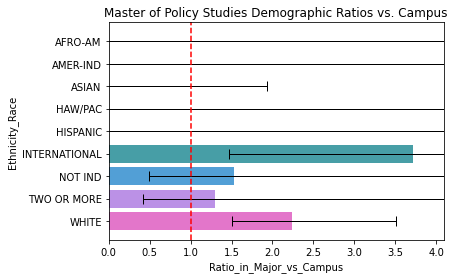

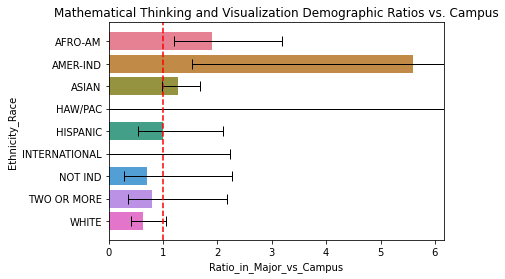

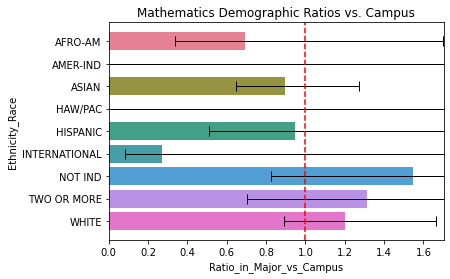

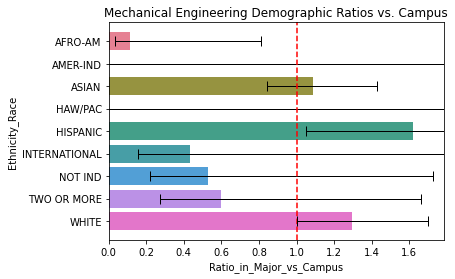

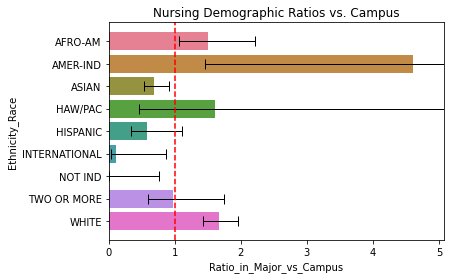

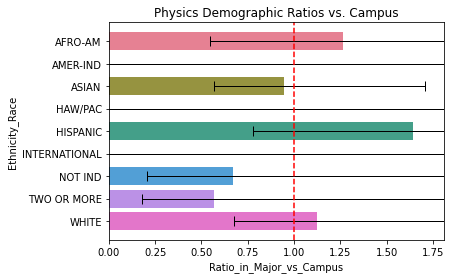

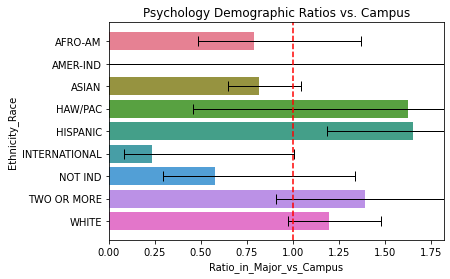

Plotting major: Nursing


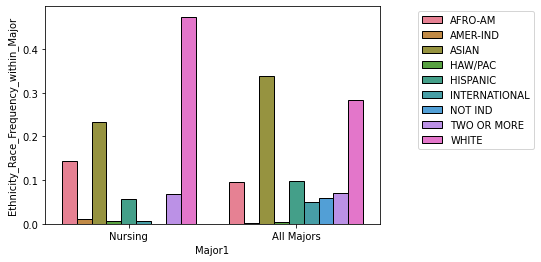

Plotting major: Business (MBA)


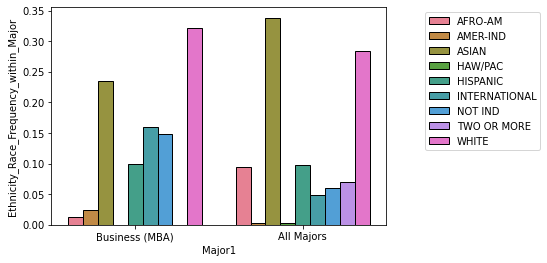

Plotting major: Biology


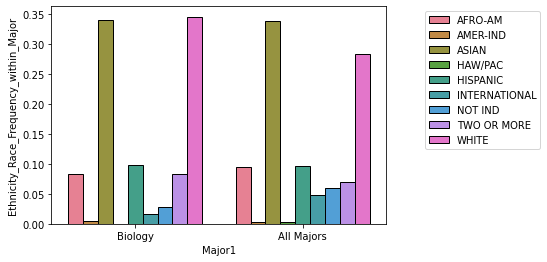

Plotting major: Psychology


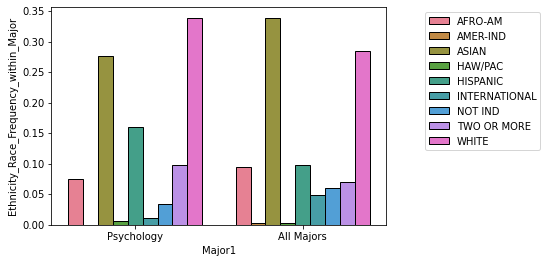

Plotting major: Chemistry


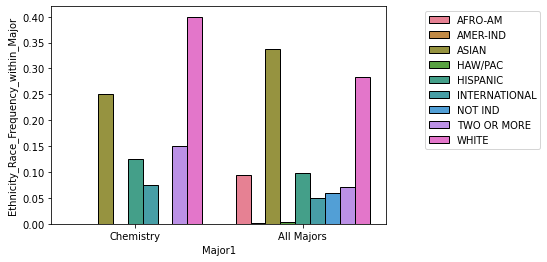

Plotting major: Master of Policy Studies


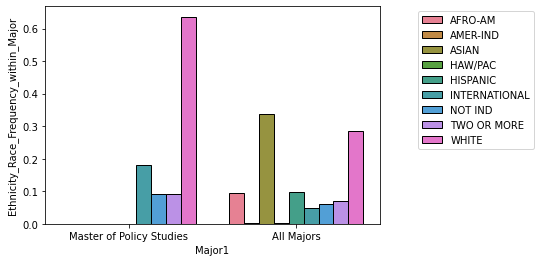

Plotting major: Mathematics


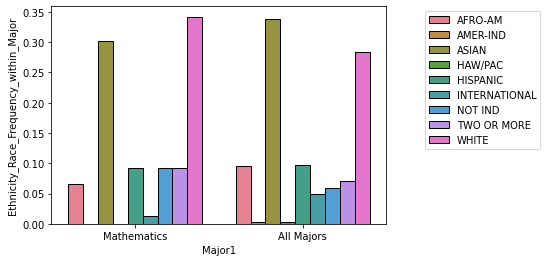

Plotting major: Mathematical Thinking and Visualization


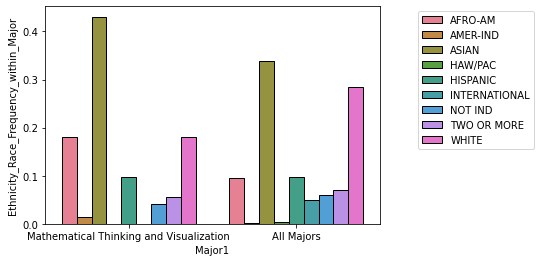

Plotting major: Computing and Software Systems


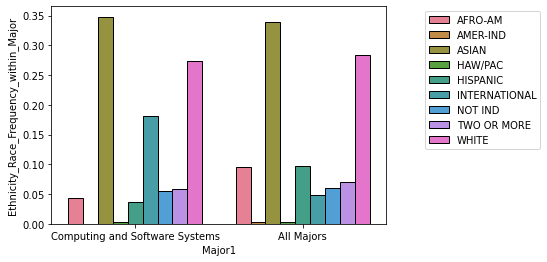

Plotting major: Environmental Studies


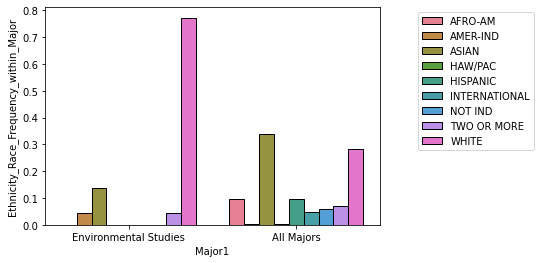

Plotting major: Accounting


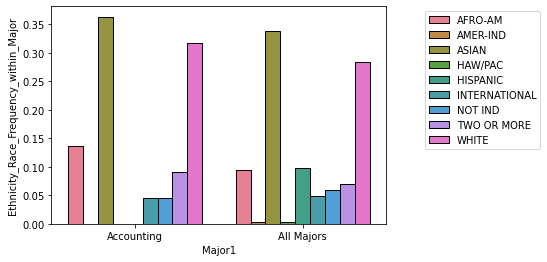

Plotting major: Master of Fine Arts in Creative Writing and Poetics


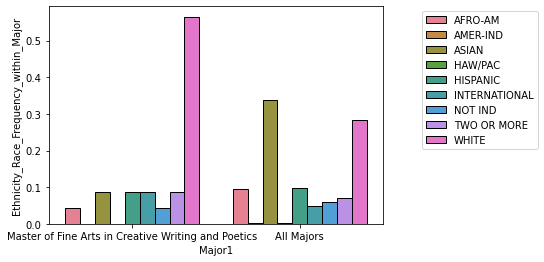

Plotting major: Physics


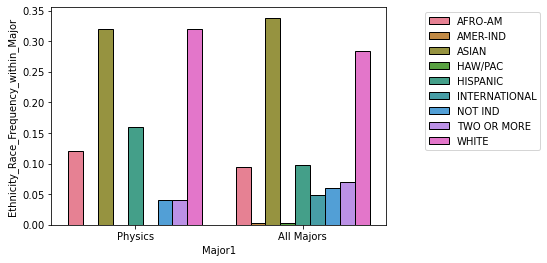

Plotting major: Electrical Engineering


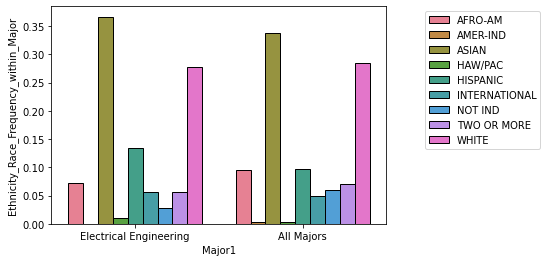

Plotting major: Business


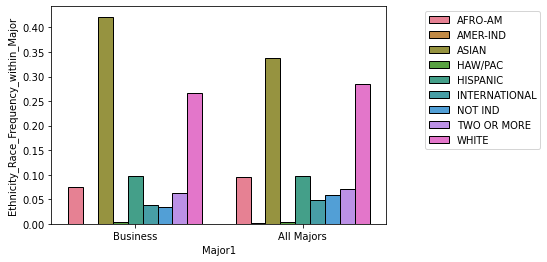

Plotting major: Education


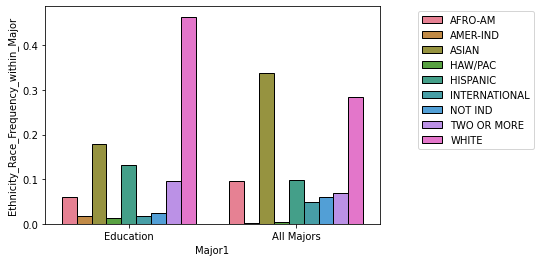

Plotting major: All Majors


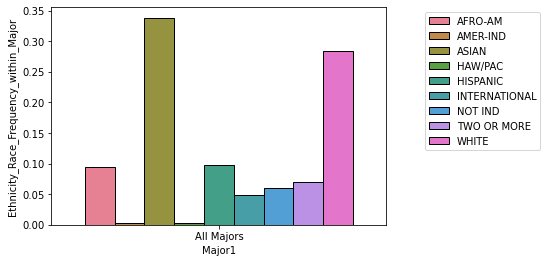

Plotting major: Mechanical Engineering


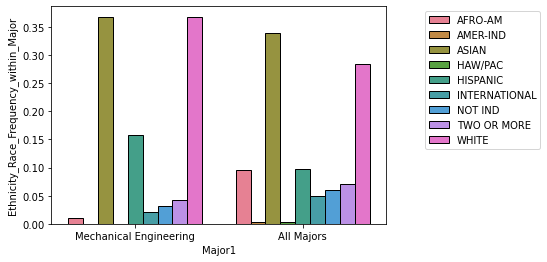

Generating plots for Underrepresented
Saving raw count data to ../output/student_data_winter_2023/Underrepresented_count_summary.csv


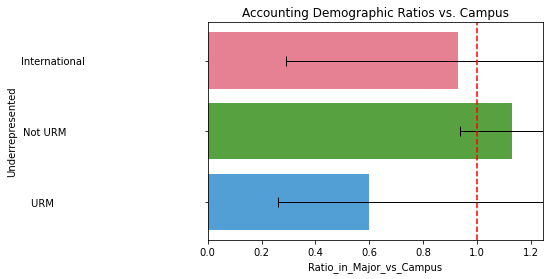

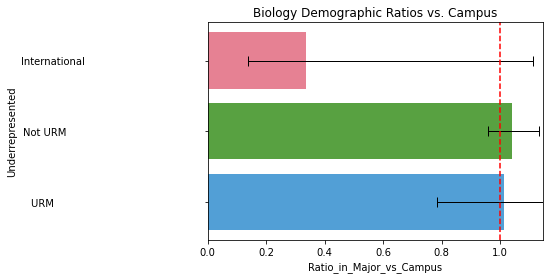

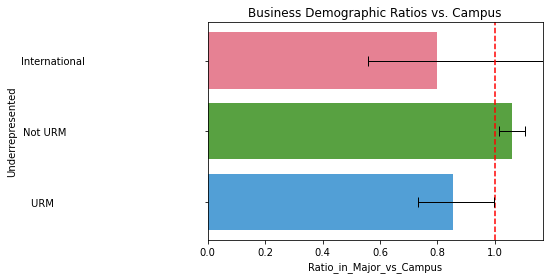

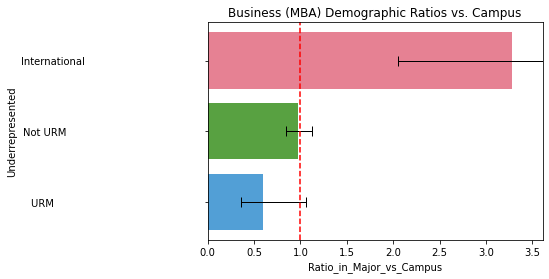

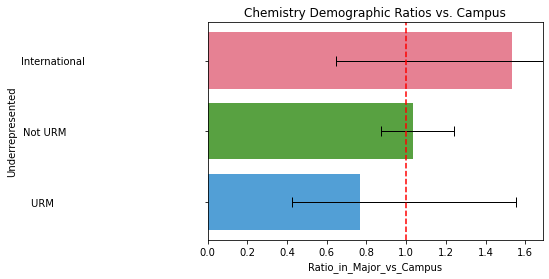

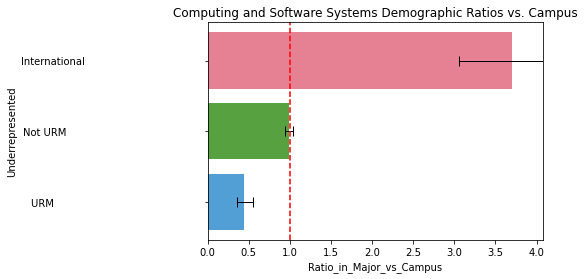

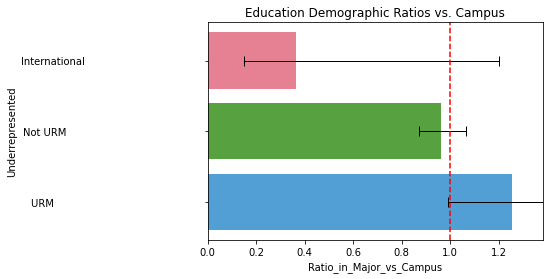

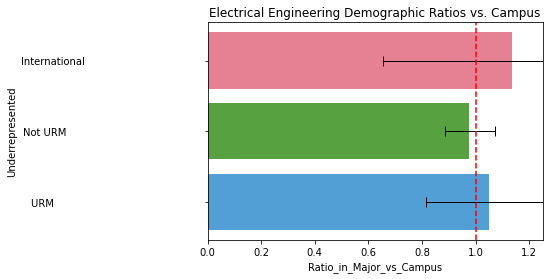

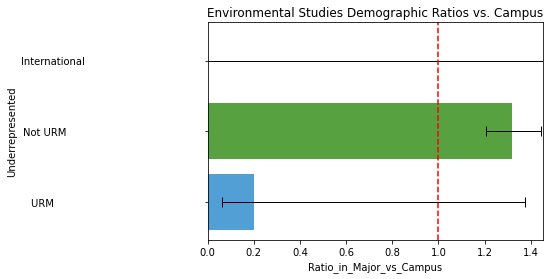

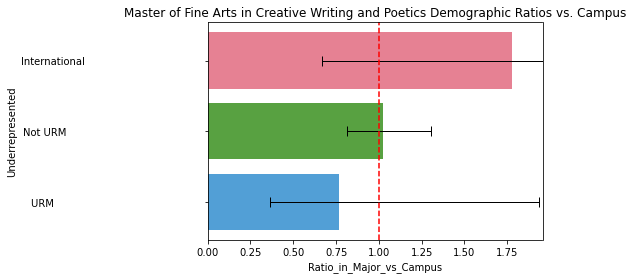

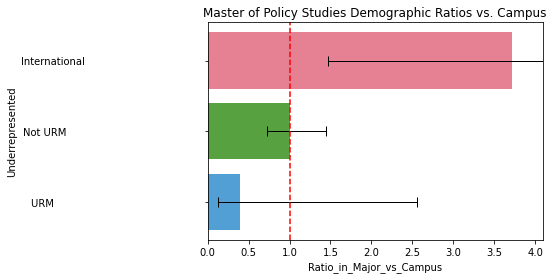

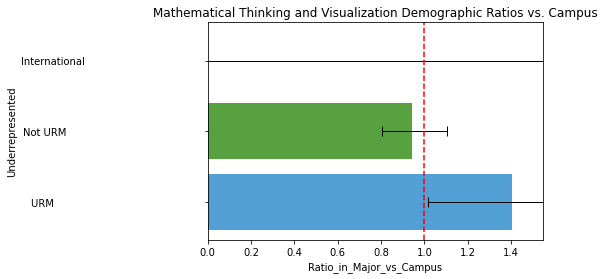

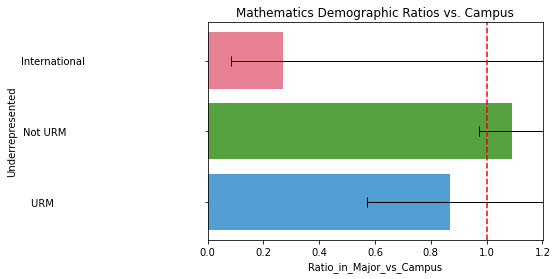

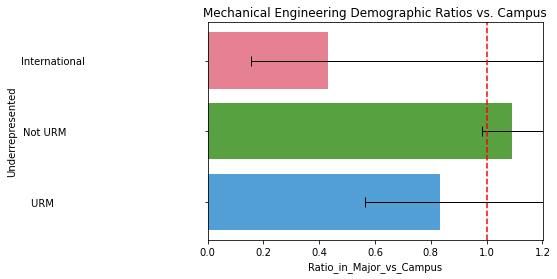

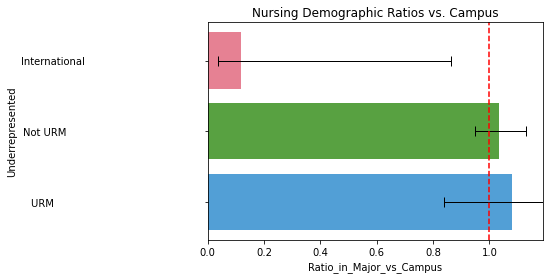

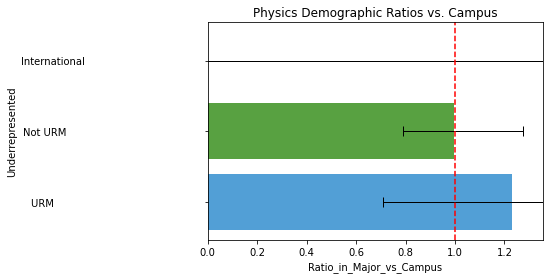

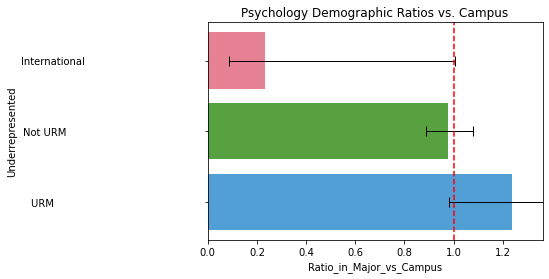

Plotting major: Nursing


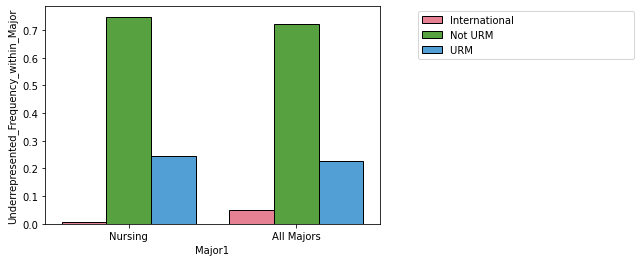

Plotting major: Business (MBA)


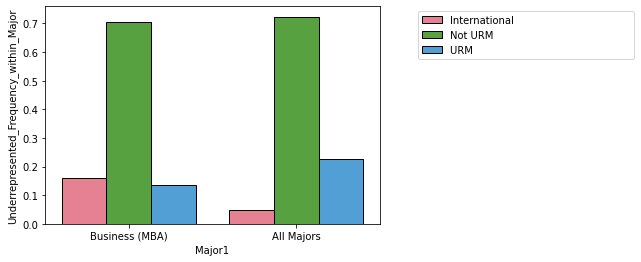

Plotting major: Biology


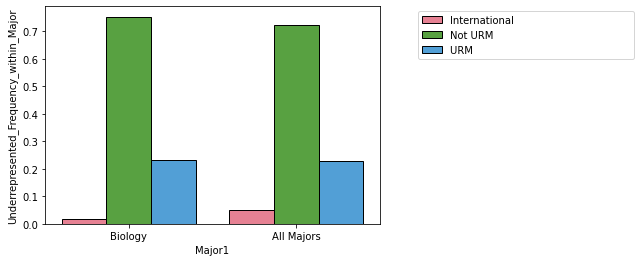

Plotting major: Psychology


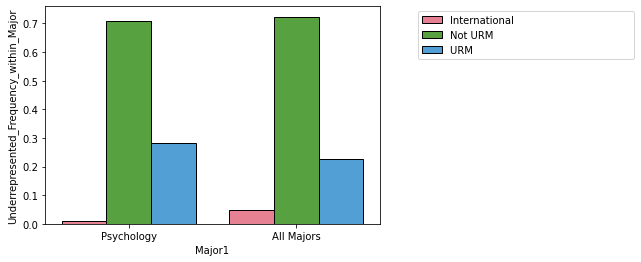

Plotting major: Chemistry


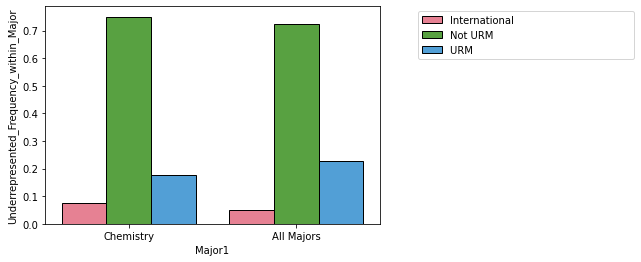

Plotting major: Master of Policy Studies


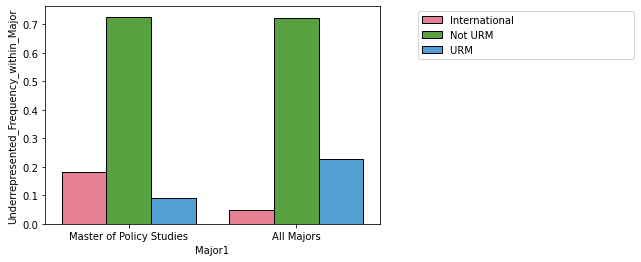

Plotting major: Mathematics


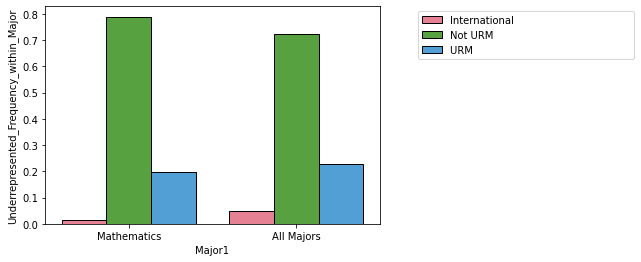

Plotting major: Mathematical Thinking and Visualization


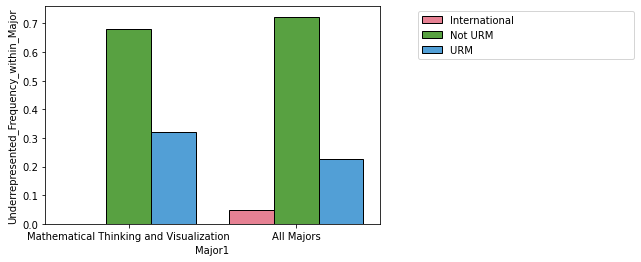

Plotting major: Computing and Software Systems


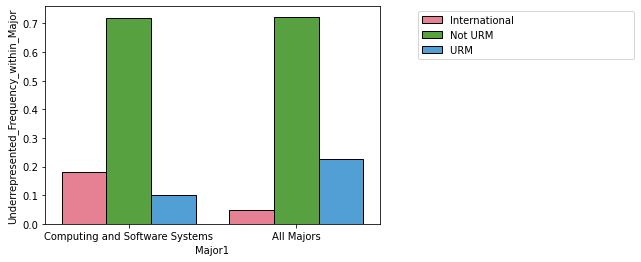

Plotting major: Environmental Studies


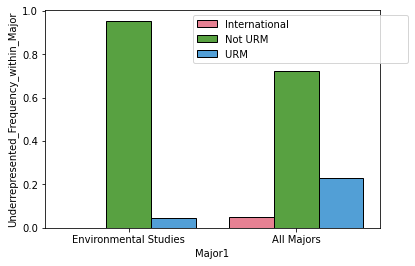

Plotting major: Accounting


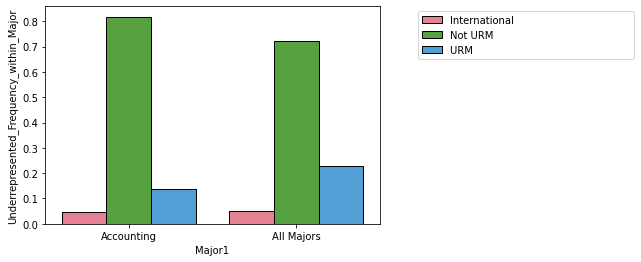

Plotting major: Master of Fine Arts in Creative Writing and Poetics


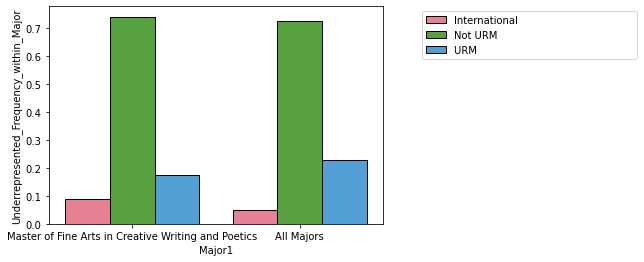

Plotting major: Physics


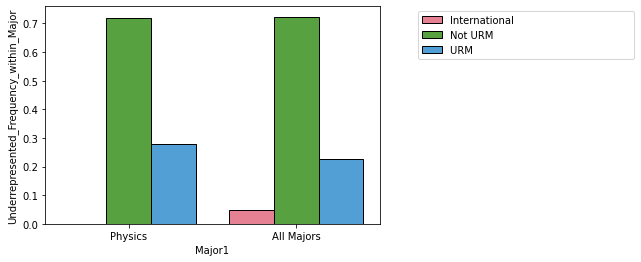

Plotting major: Electrical Engineering


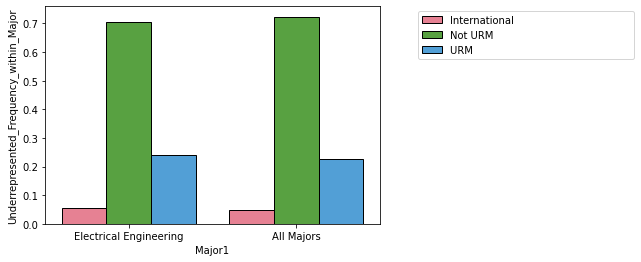

Plotting major: Business


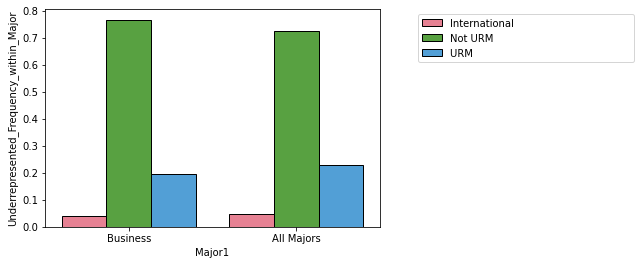

Plotting major: Education


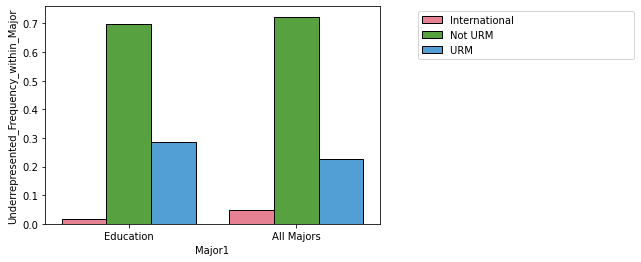

Plotting major: All Majors


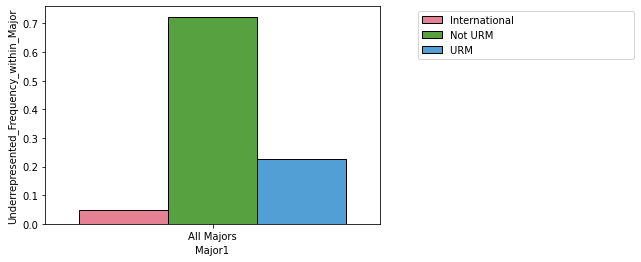

Plotting major: Mechanical Engineering


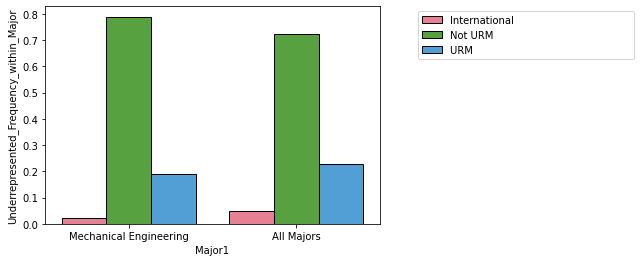

Generating plots for First_Generation
Zero counts prevent generating this data...skipping
Generating plots for First_Generation_4_Yr
Saving raw count data to ../output/student_data_winter_2023/First_Generation_4_Yr_count_summary.csv


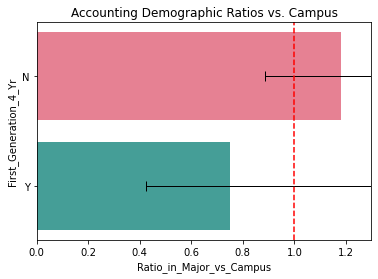

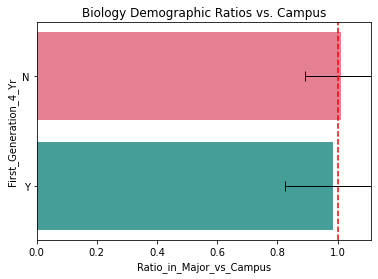

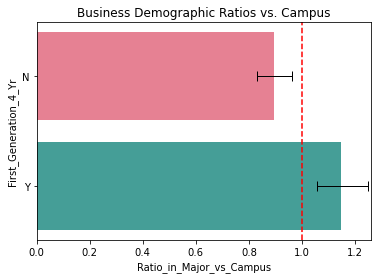

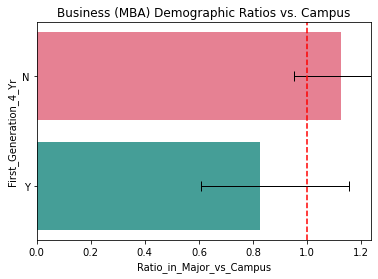

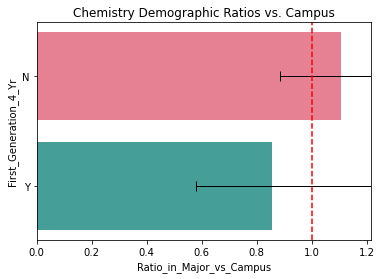

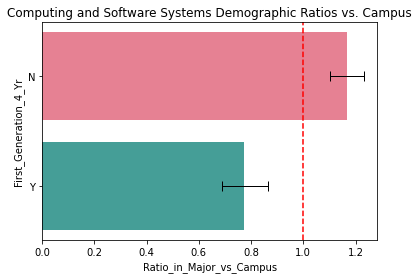

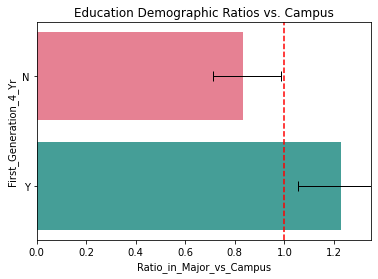

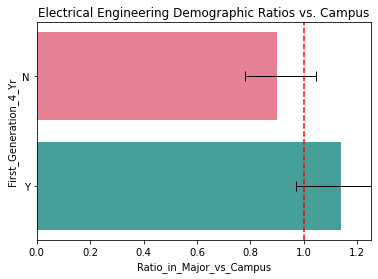

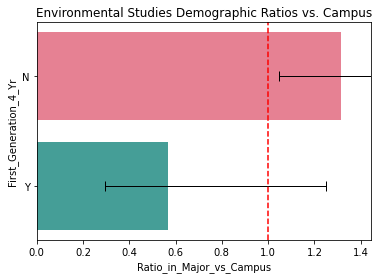

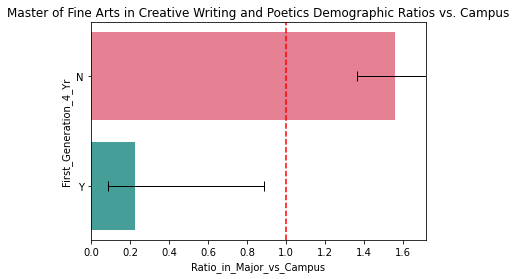

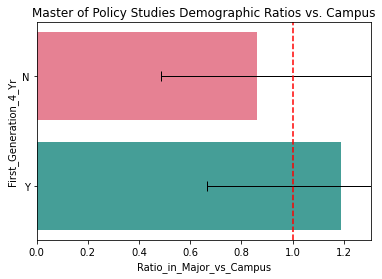

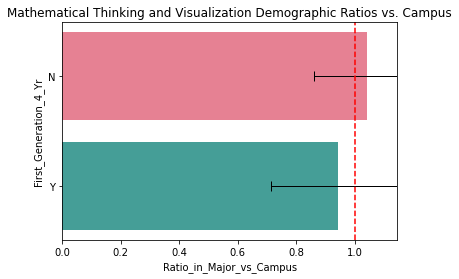

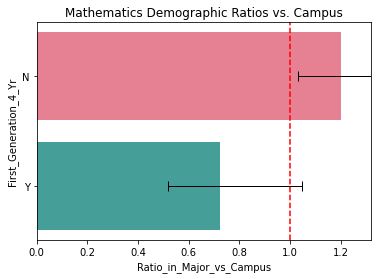

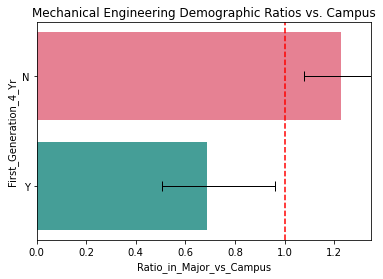

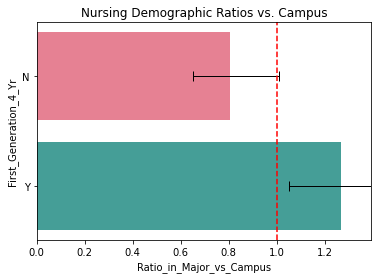

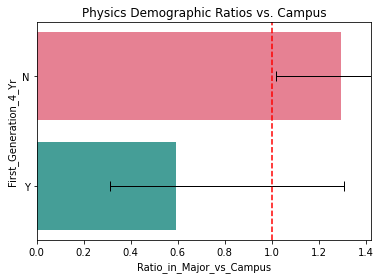

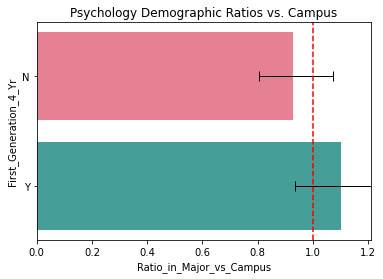

Plotting major: Nursing


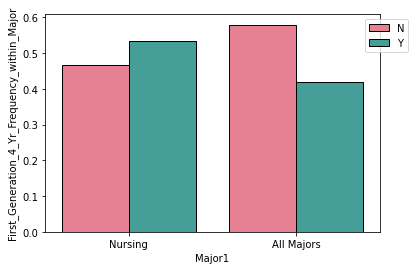

Plotting major: Business (MBA)


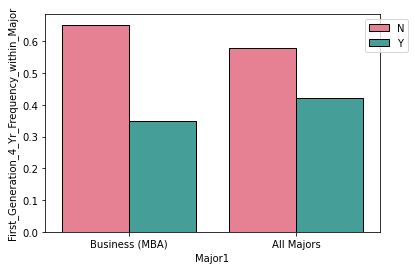

Plotting major: Biology


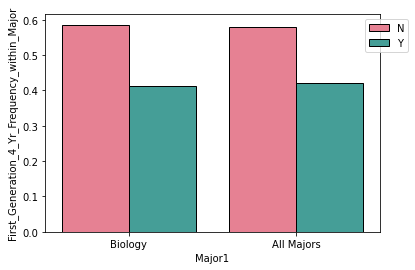

Plotting major: Psychology


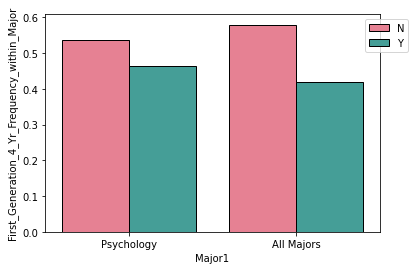

Plotting major: Chemistry


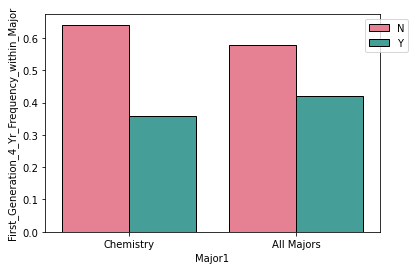

Plotting major: Master of Policy Studies


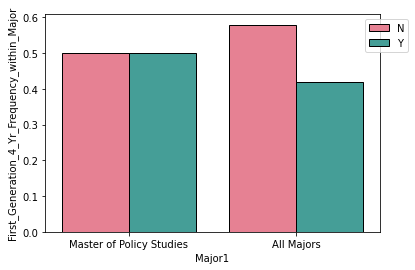

Plotting major: Mathematics


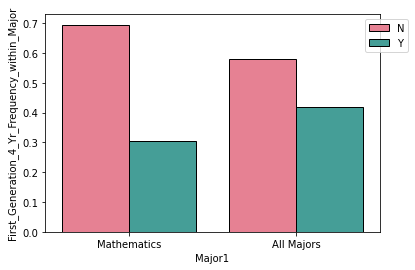

Plotting major: Mathematical Thinking and Visualization


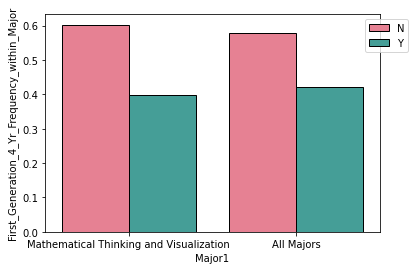

Plotting major: Computing and Software Systems


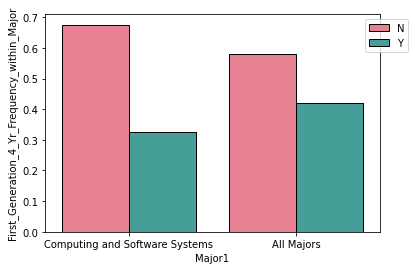

Plotting major: Environmental Studies


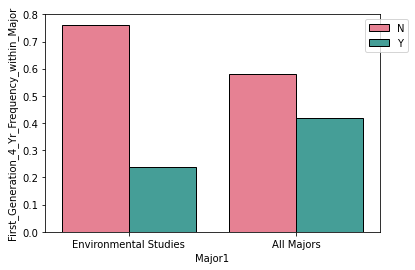

Plotting major: Accounting


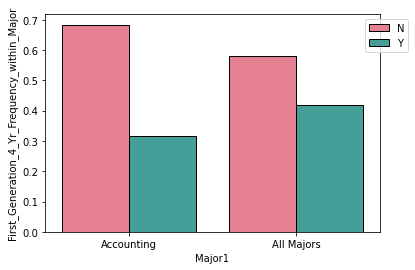

Plotting major: Master of Fine Arts in Creative Writing and Poetics


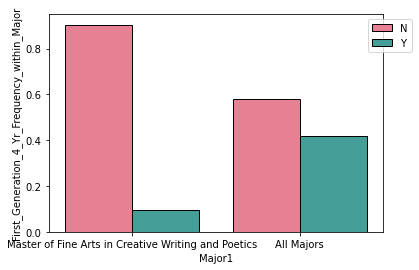

Plotting major: Physics


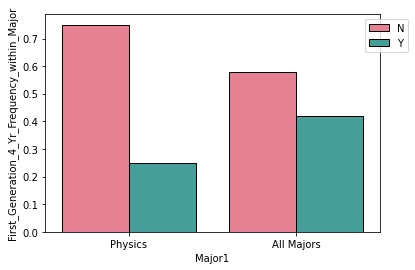

Plotting major: Electrical Engineering


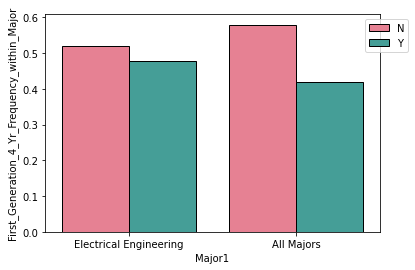

Plotting major: Business


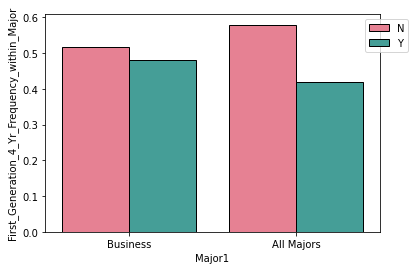

Plotting major: Education


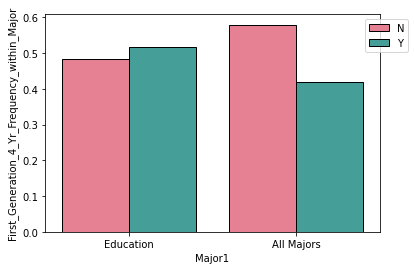

Plotting major: All Majors


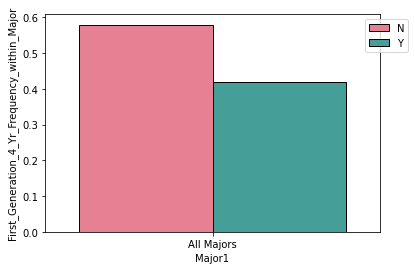

Plotting major: Mechanical Engineering


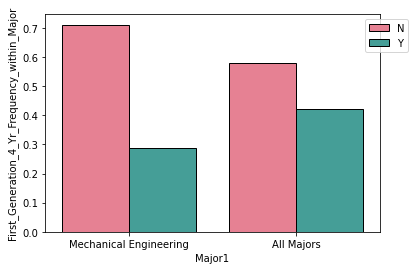

Generating plots for Veteran
Saving raw count data to ../output/student_data_winter_2023/Veteran_count_summary.csv


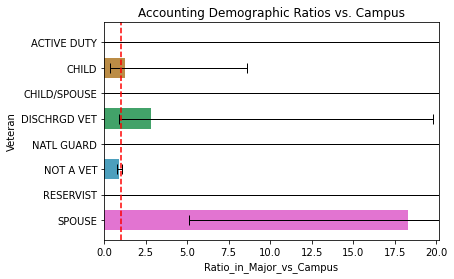

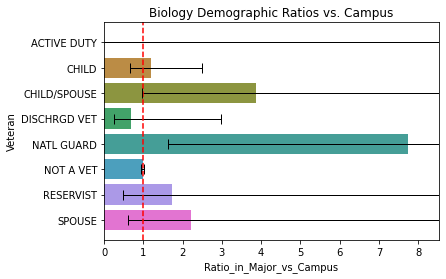

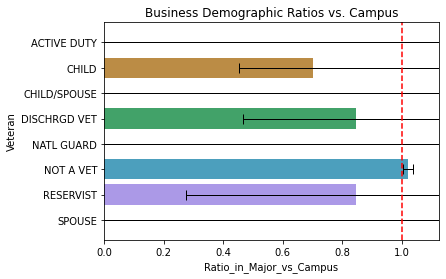

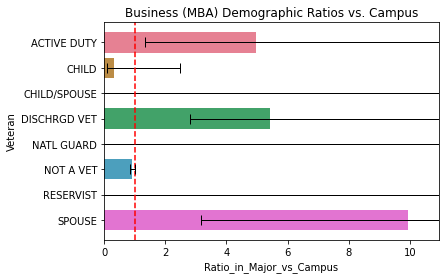

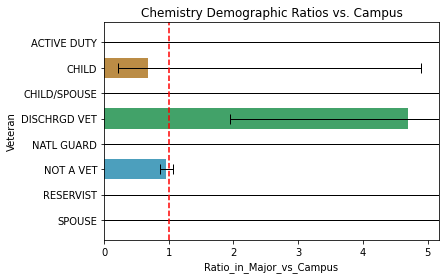

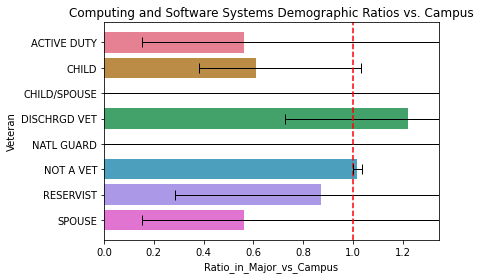

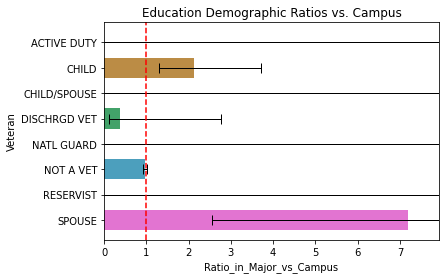

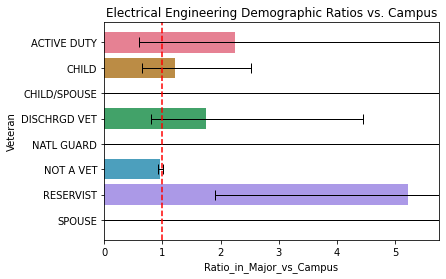

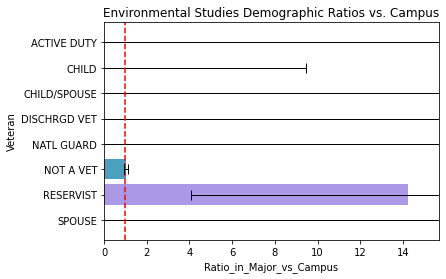

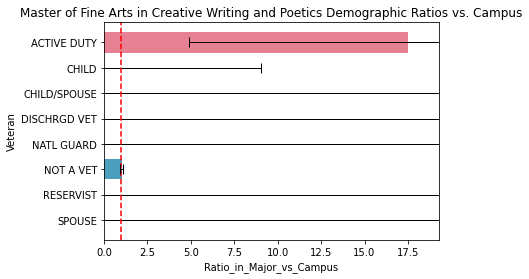

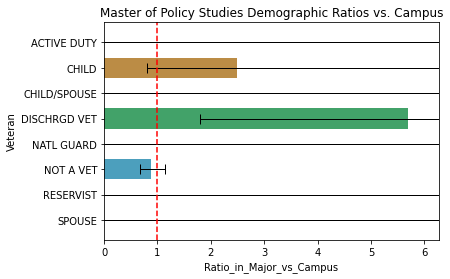

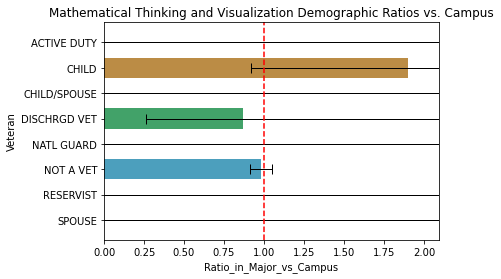

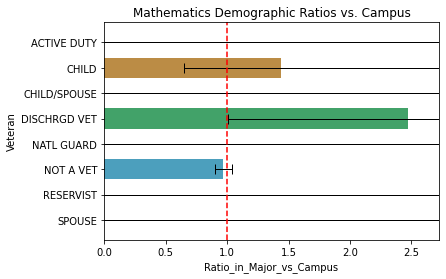

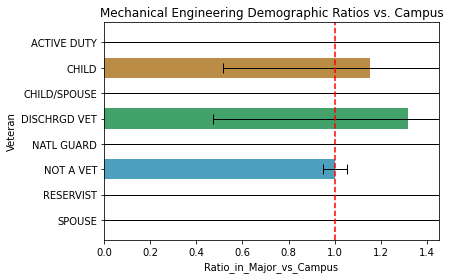

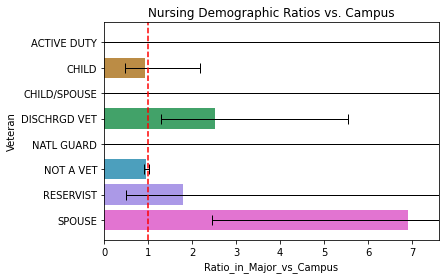

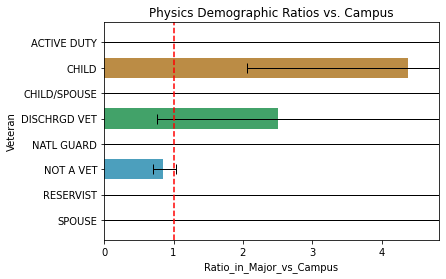

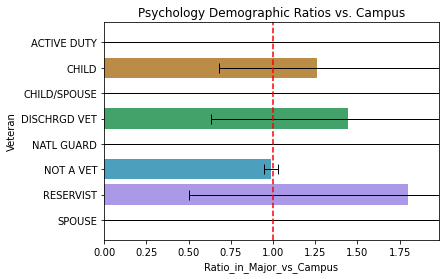

Plotting major: Nursing


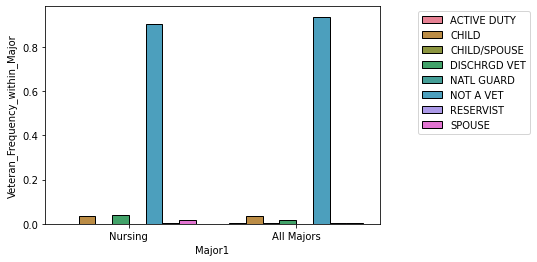

Plotting major: Business (MBA)


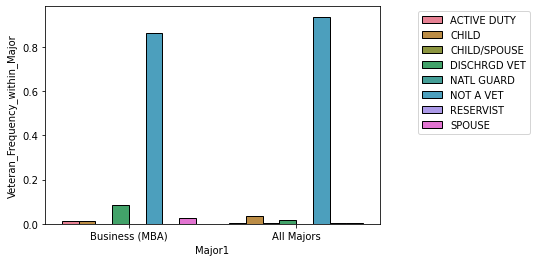

Plotting major: Biology


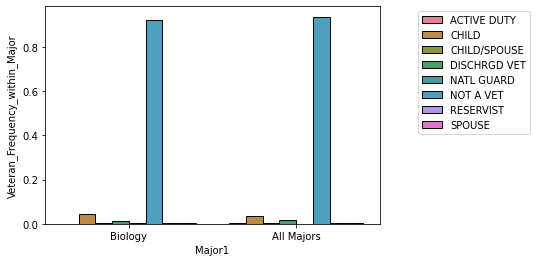

Plotting major: Psychology


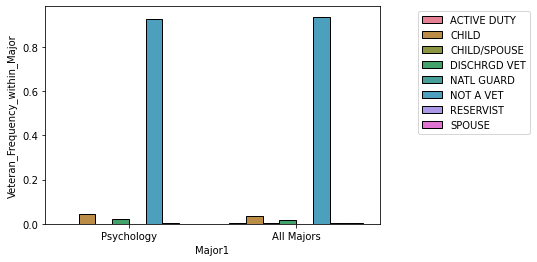

Plotting major: Chemistry


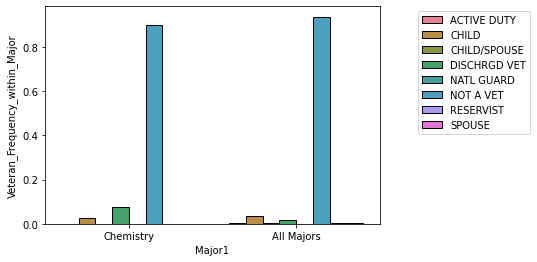

Plotting major: Master of Policy Studies


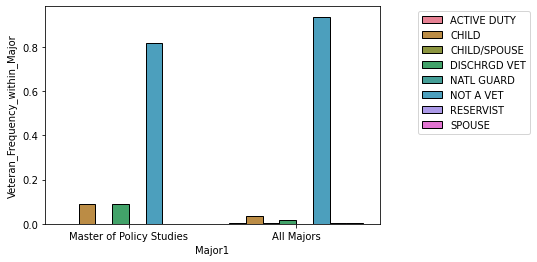

Plotting major: Mathematics


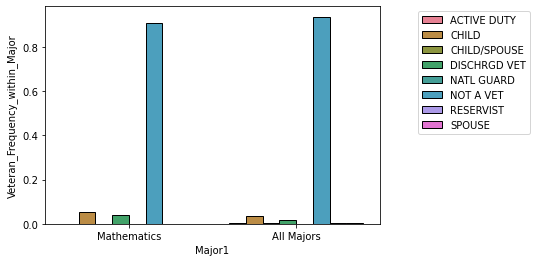

Plotting major: Mathematical Thinking and Visualization


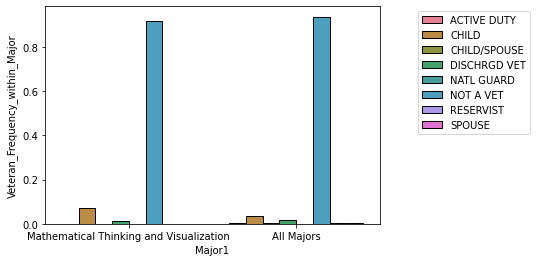

Plotting major: Computing and Software Systems


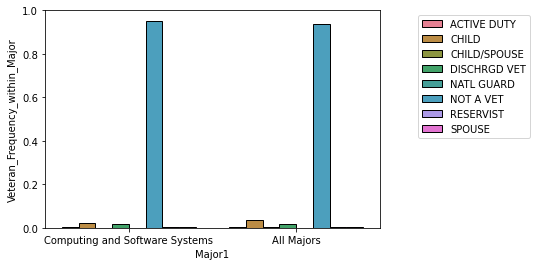

Plotting major: Environmental Studies


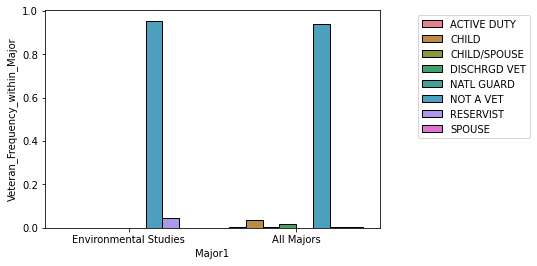

Plotting major: Accounting


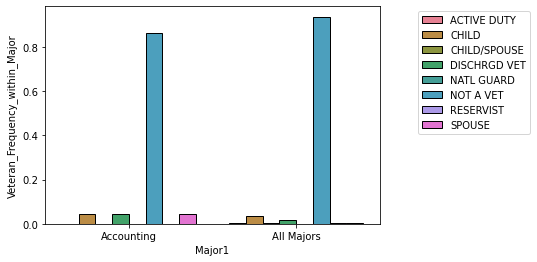

Plotting major: Master of Fine Arts in Creative Writing and Poetics


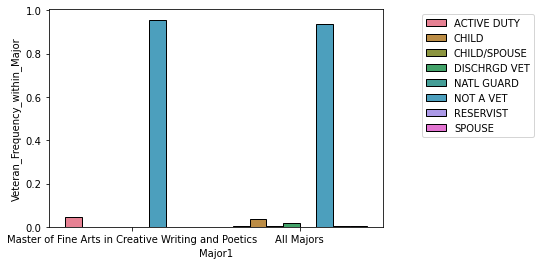

Plotting major: Physics


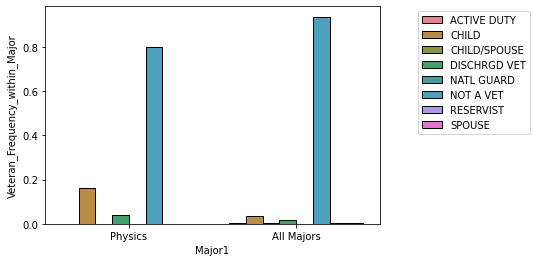

Plotting major: Electrical Engineering


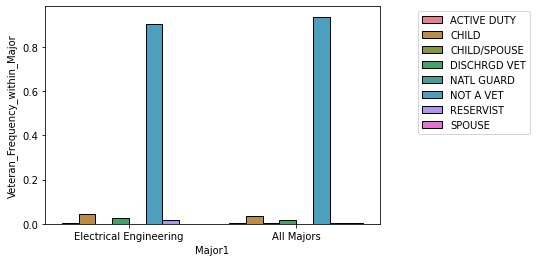

Plotting major: Business


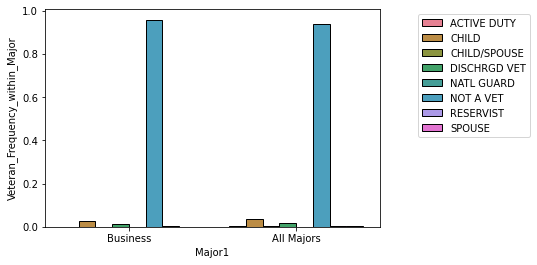

Plotting major: Education


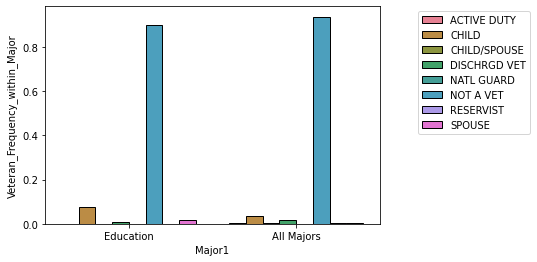

Plotting major: All Majors


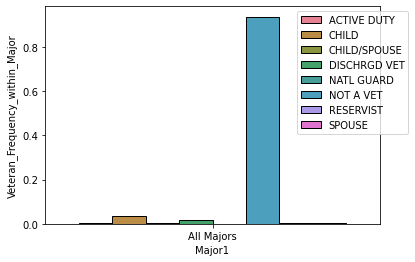

Plotting major: Mechanical Engineering


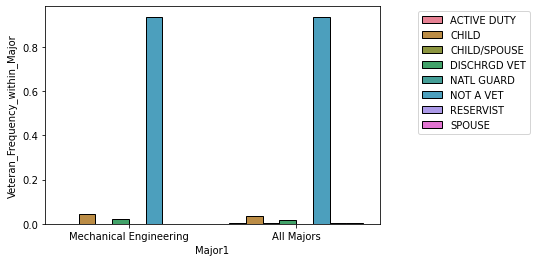

<Figure size 432x288 with 0 Axes>

In [14]:
from os import mkdir
from os.path import join,exists

demographic_cols = ['Gender','Ethnicity_Race','Underrepresented','First_Generation', 'First_Generation_4_Yr', 'Veteran']

#collect the names of all files in the data directory
input_filepaths = listdir(data_dir)
for input_file_name in input_filepaths:
    print(f"Analyzing {input_file_name}...")
    if not input_file_name.startswith("student_data"):
        print(f"{input_file_name} is not a student data file ... skipping")
        continue
    #Skip files that aren't csvs (note: you can export to csv from Excel)
    if file_extension != ".csv":
        print(f"Input file {input_filepath} is not a .csv file ...skipping")
    #Get the file extension (e.g. .txt, .csv, etc)
    root_file_name,file_extension = splitext(input_file_name)
    
    analysis_dir = join(output_dir,root_file_name)
    
    
    if not exists(analysis_dir):
        print(f"Creating analysis directory: {analysis_dir}")
        mkdir(analysis_dir)
    
    overall_graph_data = None
    for demographic_col in demographic_cols:
        major_df = summarize_demographics_by_division(student_data,demographic_col=demographic_col)

        print(f"Generating plots for {demographic_col}")
  
        graph_data = summarize_counts_by_category(major_df,demographic_col)
        try:
            graph_data = add_CI_to_graph_data(graph_data)
        except ZeroDivisionError:
            print("Zero counts prevent generating this data...skipping")
            continue
        #Save a .csv file of raw data  
        summary_output_file = join(analysis_dir,f"{demographic_col}_count_summary.csv")
        #Replace blank space with underscores
        summary_output_file = "_".join(summary_output_file.split())
        print(f"Saving raw count data to {summary_output_file}")
        graph_data.to_csv(summary_output_file)
    
        #Plot frequencies and ratios vs. campus for each major
        plot_demographic_ratio_by_major(graph_data,demographic_col,output_dir=analysis_dir)
        plot_demographic_frequencies(major_df,demographic_col,output_dir=analysis_dir)
  
